In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import seaborn
sns.set_theme(style="darkgrid")

In [21]:
settings = np.load('../Process_SIM/SIM_settings.npy',allow_pickle='TRUE').item()
settings

{'save_eventlog': [1],
 'statespace_size': [5, 6, 7, 8, 9, 10],
 'number_of_traces': [100],
 'process_entropy': ['min_entropy', 'max_entropy', 'med_entropy'],
 'process_type': ['memory', 'memoryless'],
 'process_memory': [10],
 'PS_med_ent_e_steps': [5],
 'PS_med_ent_n_transitions': [5],
 'PS_med_ent_max_trials': [100],
 'TS_inter_arrival_time': [1],
 'TS_process_stability_scale': [0.1],
 'TS_resource_availability_p': [0.5],
 'TS_resource_availability_n': [3],
 'TS_resource_availability_m': [0.041],
 'TS_activity_duration_lambda_range': [1],
 'Deterministic_offset_type_W': 'weekdays',
 'Deterministic_offset_u': [7],
 'statespace': [0, 1, 2, 3, 4],
 'Deterministic_offset_W': ([[0, 1, 2, 3, 4, 5],
   [0.5, 1.5, 2.5, 3.5, 4.5, 7]],)}

In [22]:
experiments = pd.read_csv("../Process_SIM/Experiments.csv")
experiments.head()

,save_eventlog,statespace_size,number_of_traces,process_entropy,process_type,process_memory,PS_med_ent_e_steps,PS_med_ent_n_transitions,PS_med_ent_max_trials,TS_inter_arrival_time,...,TS_resource_availability_n,TS_resource_availability_m,TS_activity_duration_lambda_range,Deterministic_offset_type_W,Deterministic_offset_u,repetitions,Name_fix,RUN,Done,Failure
0,1.0,5,100.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,3.0,0.041,1.0,weekdays,7.0,1.0,1,1,1,0
1,1.0,10,100.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,3.0,0.041,1.0,weekdays,7.0,1.0,1,2,1,0
2,1.0,5,500.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,3.0,0.041,1.0,weekdays,7.0,1.0,1,3,1,0
3,1.0,10,500.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,3.0,0.041,1.0,weekdays,7.0,1.0,1,4,1,0
4,1.0,5,1000.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,3.0,0.041,1.0,weekdays,7.0,1.0,1,5,1,0


In [23]:
results = pd.read_csv("../Process_SIM/Sim_test.csv")
results.head()

,save_eventlog,statespace_size,number_of_traces,process_entropy,process_type,process_memory,PS_med_ent_e_steps,PS_med_ent_n_transitions,PS_med_ent_max_trials,TS_inter_arrival_time,...,Failure,run,simulation_time,statespace,a_n_cases,a_n_events,a_min_events,a_mean_events,a_median_events,a_max_events
0,1.0,5,100.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0,0,0.267310,5,100,500,1,3.0,3.0,5
1,1.0,10,100.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0,1,0.384039,10,100,1000,1,5.5,5.5,10
2,1.0,5,500.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0,2,1.276705,5,500,2500,1,3.0,3.0,5
3,1.0,10,500.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0,3,1.886178,10,500,5000,1,5.5,5.5,10
4,1.0,5,1000.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0,4,2.462651,5,1000,5000,1,3.0,3.0,5


### No missing experiments?

In [24]:
len(results)==len(experiments)

True

In [25]:
results.columns

Index(['save_eventlog', 'statespace_size', 'number_of_traces',
       'process_entropy', 'process_type', 'process_memory',
       'PS_med_ent_e_steps', 'PS_med_ent_n_transitions',
       'PS_med_ent_max_trials', 'TS_inter_arrival_time',
       'TS_process_stability_scale', 'TS_resource_availability_p',
       'TS_resource_availability_n', 'TS_resource_availability_m',
       'TS_activity_duration_lambda_range', 'Deterministic_offset_type_W',
       'Deterministic_offset_u', 'repetitions', 'Name_fix', 'RUN', 'Done',
       'Failure', 'run', 'simulation_time', 'statespace', 'a_n_cases',
       'a_n_events', 'a_min_events', 'a_mean_events', 'a_median_events',
       'a_max_events'],
      dtype='object')

In [26]:
# Lookup the values from the npy file
variables = ["process_entropy","process_type",'Deterministic_offset_type_W']

if 'Name_fix' not in results:
    results["Name_fix"] = 0
    
    for variable in variables:
        print(variable)
        for run in results.index:
            #print(run)
            idx = int(results[variable].loc[run])
            #print(idx)
            value = settings[variable][idx]
            results[variable].loc[run] = value
            #print(results[variable].loc[run])
        
    results["Name_fix"] = 1
    #print(results)

#### Generate time features

In [27]:
['caseid', 'activity', 'activity_no', 'y_acc_sum', 'X', 'Y', 'z_t',
       'h_t', 'b_t', 'q_t', 's_t', 'v_t', 'arrival_datetime', 'start_datetime',
       'end_datetime', 'start_day']
#filenames for the experiments:
filenames = []

results["res_mean_y_acc_sum"] = 0
results["res_mean_Y"] = 0
results["res_mean_X"] = 0
results["res_mean_z_t"] = 0
results["res_mean_h_t"] = 0
results["res_mean_b_t"] = 0
results["res_mean_q_t"] = 0
results["res_mean_s_t"] = 0
results["res_mean_v_t"] = 0

results["res_act_start_mon"] = 0
results["res_act_start_tue"] = 0
results["res_act_start_wed"] = 0
results["res_act_start_thu"] = 0
results["res_act_start_fri"] = 0
results["res_act_start_sat"] = 0
results["res_act_start_sun"] = 0

results["res_act_start_0_12"] = 0
results["res_act_start_12_24"] = 0

for run in results.run:
    #get filename strings
    process_entropy = results.loc[results.run==run].process_entropy.values[0]
    process_type = results.loc[results.run==run].process_type.values[0]
    
    #load eventlog
    filename = "../Process_sim/"+str(run)+"_Eventlog_"+process_entropy+"_"+process_type+".csv"
    filenames.append(filename)
    df = pd.read_csv(filename)
    
    #Analyze
    
    #get the means
    results.loc[results.run==run,"res_mean_y_acc_sum"] = np.mean(df.y_acc_sum)
    results.loc[results.run==run,"res_mean_Y"] = np.mean(df.Y)
    results.loc[results.run==run,"res_mean_X"] = np.mean(df.X)
    results.loc[results.run==run,"res_mean_z_t"] = np.mean(df.z_t)
    results.loc[results.run==run,"res_mean_h_t"] = np.mean(df.h_t)
    results.loc[results.run==run,"res_mean_b_t"] = np.mean(df.b_t)
    results.loc[results.run==run,"res_mean_q_t"] = np.mean(df.q_t)
    results.loc[results.run==run,"res_mean_s_t"] = np.mean(df.s_t)
    results.loc[results.run==run,"res_mean_v_t"] = np.mean(df.v_t)
    
    #figure out which day it starts, 
    #counts = df['start_day'].value_counts()
    days = df['start_day'].value_counts().index

    
    # set the values
    if "Monday" in days:
        results.loc[results.run==run,"res_act_start_mon"] = df['start_day'].value_counts()["Monday"]
    if "Tuesday" in days:
        results.loc[results.run==run,"res_act_start_tue"] = df['start_day'].value_counts()["Tuesday"]
    if "Wednesday" in days:
        results.loc[results.run==run,"res_act_start_wed"] = df['start_day'].value_counts()["Wednesday"]
    if "Thursday" in days:
        results.loc[results.run==run,"res_act_start_thu"] = df['start_day'].value_counts()["Thursday"]
    if "Friday" in days:
        results.loc[results.run==run,"res_act_start_fri"] = df['start_day'].value_counts()["Friday"]
    if "Saturday" in days:
        results.loc[results.run==run,"res_act_start_sat"] = df['start_day'].value_counts()["Saturday"]
    if "Sunday" in days:
        results.loc[results.run==run,"res_act_start_sun"] = df['start_day'].value_counts()["Sunday"]
    
    #figure out when it starts
    df['start_datetime'] = pd.to_datetime(df['start_datetime'])
    df['time_hour'] = df['start_datetime'].apply(lambda x: x.hour)
    df["res_act_start_0_12"] = (df['time_hour'] < 12)*1
    df["res_act_start_12_24"] = (df['time_hour'] >= 12)*1
    
    # set the values 
    results.loc[results.run==run,"res_act_start_0_12"] = np.sum(df["res_act_start_0_12"])
    results.loc[results.run==run,"res_act_start_12_24"] = np.sum(df["res_act_start_12_24"])
print("done")

done


In [28]:
results

,save_eventlog,statespace_size,number_of_traces,process_entropy,process_type,process_memory,PS_med_ent_e_steps,PS_med_ent_n_transitions,PS_med_ent_max_trials,TS_inter_arrival_time,...,res_mean_v_t,res_act_start_mon,res_act_start_tue,res_act_start_wed,res_act_start_thu,res_act_start_fri,res_act_start_sat,res_act_start_sun,res_act_start_0_12,res_act_start_12_24
0,1.0,5,100.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.691333,148,97,96,73,86,0,0,0,500
1,1.0,10,100.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.648093,278,184,178,185,175,0,0,0,1000
2,1.0,5,500.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.464466,689,575,470,407,359,0,0,0,2500
3,1.0,10,500.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.507307,1244,1107,980,879,790,0,0,1,4999
4,1.0,5,1000.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.458297,1551,1056,917,794,682,0,0,0,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,1.0,10,100.0,max_entropy,memory,10.0,0.0,5.0,0.0,1.5,...,0.263917,110,106,92,109,101,91,107,1,715
2300,1.0,5,500.0,max_entropy,memory,10.0,0.0,5.0,0.0,1.5,...,0.285199,358,367,325,364,334,384,416,2,2546
2301,1.0,10,500.0,max_entropy,memory,10.0,0.0,5.0,0.0,1.5,...,0.249806,446,509,480,463,508,479,499,0,3384
2302,1.0,5,1000.0,max_entropy,memory,10.0,0.0,5.0,0.0,1.5,...,0.247803,703,736,737,702,724,715,694,1,5010


### Generate example table output

In [29]:
table_example = df.loc[df.caseid==0]
table_example.rename({"activity_no":"t"},axis=1,inplace=True)
table_example = table_example.drop(["y_acc_sum","start_day","start_hour"],axis=1)
table_example.X = np.round(table_example.X,2)
table_example.Y = np.round(table_example.Y,2)
table_example.z_t = np.round(table_example.z_t,2)
table_example.b_t = np.round(table_example.b_t,2)
table_example.q_t = np.round(table_example.q_t,2)
table_example.q_t = np.round(table_example.q_t,2)
table_example.s_t = np.round(table_example.s_t,2)
table_example.v_t = np.round(table_example.v_t,2)

table_example1 = table_example.drop(["arrival_datetime","start_datetime","end_datetime"],axis=1)
table_example2 = table_example[["caseid","t","arrival_datetime","start_datetime","end_datetime"]]

table_example

C:\Users\Mike\AppData\Local\Temp\ipykernel_10844\1293426735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_example.rename({"activity_no":"t"},axis=1,inplace=True)


,caseid,activity,t,X,Y,z_t,h_t,b_t,q_t,s_t,v_t,arrival_datetime,start_datetime,end_datetime,time_hour,res_act_start_0_12,res_act_start_12_24
0,0,S10,1,1.33,1.41,1.33,0.0,1.66,2.99,0.00,0.08,1970-01-06 07:54:40,1970-01-07 23:42:46,1970-01-06 09:50:55,23,0,1
1,0,S1,2,1.41,1.62,1.33,0.0,0.48,1.89,0.00,0.21,1970-01-06 09:50:55,1970-01-06 21:16:37,1970-01-06 14:49:57,21,0,1
2,0,S6,3,1.62,2.19,1.33,0.0,0.49,2.11,0.39,0.18,1970-01-06 14:49:57,1970-01-07 12:00:00,1970-01-07 04:33:05,12,0,1
3,0,S2,4,2.19,2.51,1.33,0.0,3.28,5.46,0.04,0.29,1970-01-07 04:33:05,1970-01-10 12:00:00,1970-01-07 12:19:01,12,0,1
4,0,S4,5,2.51,2.82,1.33,0.0,0.88,3.39,0.11,0.20,1970-01-07 12:19:01,1970-01-08 12:00:00,1970-01-07 19:35:04,12,0,1


In [30]:
print(table_example1.to_latex(index=False))

\begin{tabular}{rlrrrrrrrrrrrr}
\toprule
 caseid & activity &  t &    X &    Y &  z\_t &  h\_t &  b\_t &  q\_t &  s\_t &  v\_t &  time\_hour &  res\_act\_start\_0\_12 &  res\_act\_start\_12\_24 \\
\midrule
      0 &      S10 &  1 & 1.33 & 1.41 & 1.33 &  0.0 & 1.66 & 2.99 & 0.00 & 0.08 &         23 &                   0 &                    1 \\
      0 &       S1 &  2 & 1.41 & 1.62 & 1.33 &  0.0 & 0.48 & 1.89 & 0.00 & 0.21 &         21 &                   0 &                    1 \\
      0 &       S6 &  3 & 1.62 & 2.19 & 1.33 &  0.0 & 0.49 & 2.11 & 0.39 & 0.18 &         12 &                   0 &                    1 \\
      0 &       S2 &  4 & 2.19 & 2.51 & 1.33 &  0.0 & 3.28 & 5.46 & 0.04 & 0.29 &         12 &                   0 &                    1 \\
      0 &       S4 &  5 & 2.51 & 2.82 & 1.33 &  0.0 & 0.88 & 3.39 & 0.11 & 0.20 &         12 &                   0 &                    1 \\
\bottomrule
\end{tabular}



C:\Users\Mike\AppData\Local\Temp\ipykernel_10844\3248784663.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table_example1.to_latex(index=False))


In [31]:
print(table_example2.to_latex(index=False))

\begin{tabular}{rrlll}
\toprule
 caseid &  t &    arrival\_datetime &      start\_datetime &        end\_datetime \\
\midrule
      0 &  1 & 1970-01-06 07:54:40 & 1970-01-07 23:42:46 & 1970-01-06 09:50:55 \\
      0 &  2 & 1970-01-06 09:50:55 & 1970-01-06 21:16:37 & 1970-01-06 14:49:57 \\
      0 &  3 & 1970-01-06 14:49:57 & 1970-01-07 12:00:00 & 1970-01-07 04:33:05 \\
      0 &  4 & 1970-01-07 04:33:05 & 1970-01-10 12:00:00 & 1970-01-07 12:19:01 \\
      0 &  5 & 1970-01-07 12:19:01 & 1970-01-08 12:00:00 & 1970-01-07 19:35:04 \\
\bottomrule
\end{tabular}



C:\Users\Mike\AppData\Local\Temp\ipykernel_10844\1344654725.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table_example2.to_latex(index=False))


# Explorative analysis

# Trace distributions

# 1. Does it create the amount of cases specified?

## Max

In [32]:
pd.pivot_table(results,
                                values='a_n_cases', 
                    index=['number_of_traces'], 
                    columns=['process_type','process_entropy'],
                                aggfunc=[#np.max,
                                         #np.min,,
                                         #len,
                                         np.max])

amax                                                  \
process_type          memory                          memoryless               
process_entropy  max_entropy med_entropy min_entropy max_entropy med_entropy   
number_of_traces                                                               
100.0                    100         100         100         100         100   
500.0                    500         500         500         500         500   
1000.0                  1000        1000        1000        1000        1000   

                              
process_type                  
process_entropy  min_entropy  
number_of_traces              
100.0                    100  
500.0                    500  
1000.0                  1000

## Mean

In [33]:
pd.pivot_table(results,
                                values='a_n_cases', 
                    index=['number_of_traces'], 
                    columns=['process_type','process_entropy'],
                                aggfunc=[#np.max,
                                         #np.min,,
                                         #len,
                                         np.mean])

mean                                                  \
process_type          memory                          memoryless               
process_entropy  max_entropy med_entropy min_entropy max_entropy med_entropy   
number_of_traces                                                               
100.0                    100         100         100         100         100   
500.0                    500         500         500         500         500   
1000.0                  1000        1000        1000        1000        1000   

                              
process_type                  
process_entropy  min_entropy  
number_of_traces              
100.0                    100  
500.0                    500  
1000.0                  1000

## Min

In [34]:
pd.pivot_table(results,
                    values='a_n_cases', 
                    index=['number_of_traces'], 
                    columns=['process_type','process_entropy'], 
                    aggfunc=[#np.max,
                             #np.min,,
                             #len,
                             np.min])

amin                                                  \
process_type          memory                          memoryless               
process_entropy  max_entropy med_entropy min_entropy max_entropy med_entropy   
number_of_traces                                                               
100.0                    100         100         100         100         100   
500.0                    500         500         500         500         500   
1000.0                  1000        1000        1000        1000        1000   

                              
process_type                  
process_entropy  min_entropy  
number_of_traces              
100.0                    100  
500.0                    500  
1000.0                  1000

### Conclusions: 
- Yes

# 2. Does it create the amount of events expected?

In [35]:
"""
What is expected behavior? 

- medium entropy in the memoryless process is the only situation where the transition matrix 
    is generated in a way that is optimized for expected number of steps. Then again, 
    expected number of steps does not mean the max number of steps possible.
    
- memory process is in all settings of entropy supposed to have less than or equal to K steps

- minimum entropy is by definition limited by the number of states

"""

'\nWhat is expected behavior? \n\n- medium entropy in the memoryless process is the only situation where the transition matrix \n    is generated in a way that is optimized for expected number of steps. Then again, \n    expected number of steps does not mean the max number of steps possible.\n    \n- memory process is in all settings of entropy supposed to have less than or equal to K steps\n\n- minimum entropy is by definition limited by the number of states\n\n'

In [36]:
pd.pivot_table(results,
                    values='a_max_events', 
                    index=['process_type','process_entropy','statespace_size',"process_memory"], 
                    columns=['PS_med_ent_e_steps', 'PS_med_ent_n_transitions'], 
                    aggfunc=[#np.max,
                             #np.min,
                             #len,
                             np.max])

amax     
PS_med_ent_e_steps                                           0.0     
PS_med_ent_n_transitions                                     3.0  5.0
process_type process_entropy statespace_size process_memory          
memory       max_entropy     5               5.0               5    5
                                             10.0             10   10
                             10              5.0               5    5
                                             10.0             10   10
             med_entropy     5               5.0               5    5
                                             10.0             10   10
                             10              5.0               5    5
                                             10.0             10   10
             min_entropy     5               5.0               5    5
                                             10.0              5    5
                             10              5.0               5    5
                                             10.0             10   10
memoryless   max_entropy     5               5.0              71   72
                                             10.0             62   53
                             10              5.0             132  110
                                             10.0            129  111
             med_entropy     5               5.0              83   54
                                             10.0            107   45
                             10              5.0             952  113
                                             10.0            240  111
             min_entropy     5               5.0               5    5
                                             10.0              5    5
                             10              5.0              10   10
                                             10.0             10   10

In [37]:
np.round(pd.pivot_table(results,
                    values='a_max_events', 
                    index=['process_type','process_entropy','statespace_size',"process_memory"], 
                    columns=['PS_med_ent_e_steps', 'PS_med_ent_n_transitions'], 
                    aggfunc=[#np.max,
                             #np.min,
                             #len,
                             np.mean]),1)

mean      
PS_med_ent_e_steps                                            0.0      
PS_med_ent_n_transitions                                      3.0   5.0
process_type process_entropy statespace_size process_memory            
memory       max_entropy     5               5.0              5.0   5.0
                                             10.0            10.0  10.0
                             10              5.0              5.0   5.0
                                             10.0            10.0  10.0
             med_entropy     5               5.0              5.0   5.0
                                             10.0            10.0  10.0
                             10              5.0              5.0   5.0
                                             10.0            10.0  10.0
             min_entropy     5               5.0              5.0   5.0
                                             10.0             5.0   5.0
                             10              5.0              5.0   5.0
                                             10.0            10.0  10.0
memoryless   max_entropy     5               5.0             37.6  37.3
                                             10.0            35.5  34.6
                             10              5.0             70.8  70.6
                                             10.0            69.5  67.9
             med_entropy     5               5.0             27.8  25.5
                                             10.0            29.1  25.3
                             10              5.0             79.0  53.7
                                             10.0            62.2  54.4
             min_entropy     5               5.0              5.0   5.0
                                             10.0             5.0   5.0
                             10              5.0             10.0  10.0
                                             10.0            10.0  10.0

In [38]:
pd.pivot_table(results,
                    values='a_max_events', 
                    index=['process_type','process_entropy','statespace_size',"process_memory"], 
                    columns=['PS_med_ent_e_steps', 'PS_med_ent_n_transitions'], 
                    aggfunc=[#np.max,
                             #np.min,
                             #len,
                             np.min])

amin    
PS_med_ent_e_steps                                           0.0    
PS_med_ent_n_transitions                                     3.0 5.0
process_type process_entropy statespace_size process_memory         
memory       max_entropy     5               5.0               5   5
                                             10.0             10  10
                             10              5.0               5   5
                                             10.0             10  10
             med_entropy     5               5.0               5   5
                                             10.0             10  10
                             10              5.0               5   5
                                             10.0             10  10
             min_entropy     5               5.0               5   5
                                             10.0              5   5
                             10              5.0               5   5
                                             10.0             10  10
memoryless   max_entropy     5               5.0              17  20
                                             10.0             19  20
                             10              5.0              36  38
                                             10.0             40  38
             med_entropy     5               5.0               9  11
                                             10.0             12  13
                             10              5.0              19  25
                                             10.0             16  18
             min_entropy     5               5.0               5   5
                                             10.0              5   5
                             10              5.0              10  10
                                             10.0             10  10

### Conclusions: 
- For the memory process, max and medium entropy is almost fixed at the same values as K, which was expected

- For the memoryless process, traces become very long on average. For the medium entropy setting, the average and max durations are shorter than max entropy setting, but often 4 times longer than expected steps.


### Notes:
- NaN values found in e_steps=6, n_transitions=3, in the process with memory setting 
    - => the NaN cells are levels that are missing from the results table
    - Only 512 of 1296 experiments were stored in results table, however, all were run as seen in number of eventlogs

- Perhaps it would be beneficial to put eventlogs into folders, containing all relevant objects such as transition matrices

In [39]:
results.columns

Index(['save_eventlog', 'statespace_size', 'number_of_traces',
       'process_entropy', 'process_type', 'process_memory',
       'PS_med_ent_e_steps', 'PS_med_ent_n_transitions',
       'PS_med_ent_max_trials', 'TS_inter_arrival_time',
       'TS_process_stability_scale', 'TS_resource_availability_p',
       'TS_resource_availability_n', 'TS_resource_availability_m',
       'TS_activity_duration_lambda_range', 'Deterministic_offset_type_W',
       'Deterministic_offset_u', 'repetitions', 'Name_fix', 'RUN', 'Done',
       'Failure', 'run', 'simulation_time', 'statespace', 'a_n_cases',
       'a_n_events', 'a_min_events', 'a_mean_events', 'a_median_events',
       'a_max_events', 'res_mean_y_acc_sum', 'res_mean_Y', 'res_mean_X',
       'res_mean_z_t', 'res_mean_h_t', 'res_mean_b_t', 'res_mean_q_t',
       'res_mean_s_t', 'res_mean_v_t', 'res_act_start_mon',
       'res_act_start_tue', 'res_act_start_wed', 'res_act_start_thu',
       'res_act_start_fri', 'res_act_start_sat', 'res_act_sta

# 3. Trace distribution

In [40]:
results

,save_eventlog,statespace_size,number_of_traces,process_entropy,process_type,process_memory,PS_med_ent_e_steps,PS_med_ent_n_transitions,PS_med_ent_max_trials,TS_inter_arrival_time,...,res_mean_v_t,res_act_start_mon,res_act_start_tue,res_act_start_wed,res_act_start_thu,res_act_start_fri,res_act_start_sat,res_act_start_sun,res_act_start_0_12,res_act_start_12_24
0,1.0,5,100.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.691333,148,97,96,73,86,0,0,0,500
1,1.0,10,100.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.648093,278,184,178,185,175,0,0,0,1000
2,1.0,5,500.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.464466,689,575,470,407,359,0,0,0,2500
3,1.0,10,500.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.507307,1244,1107,980,879,790,0,0,1,4999
4,1.0,5,1000.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.458297,1551,1056,917,794,682,0,0,0,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,1.0,10,100.0,max_entropy,memory,10.0,0.0,5.0,0.0,1.5,...,0.263917,110,106,92,109,101,91,107,1,715
2300,1.0,5,500.0,max_entropy,memory,10.0,0.0,5.0,0.0,1.5,...,0.285199,358,367,325,364,334,384,416,2,2546
2301,1.0,10,500.0,max_entropy,memory,10.0,0.0,5.0,0.0,1.5,...,0.249806,446,509,480,463,508,479,499,0,3384
2302,1.0,5,1000.0,max_entropy,memory,10.0,0.0,5.0,0.0,1.5,...,0.247803,703,736,737,702,724,715,694,1,5010


In [41]:
for run in results.run:
    #get filename strings
    process_entropy = results.loc[results.run==run].process_entropy.values[0]
    process_type = results.loc[results.run==run].process_type.values[0]
    
    transitions = results.loc[results.run==run].PS_med_ent_n_transitions.values[0] 
    process_type = results.loc[results.run==run].process_type.values[0] 
    statespace_size = results.loc[results.run==run].statespace_size.values[0] 
    number_of_traces = results.loc[results.run==run].number_of_traces.values[0] 
    
    #load eventlog
    df = pd.read_csv("../Process_sim/"+str(run)+"_Eventlog_"+process_entropy+"_"+process_type+".csv")
    
    prefix = pd.DataFrame(df['activity_no'].value_counts())
    prefix["event_no"] = df['activity_no'].value_counts().index
    
    prefix["transitions"] = transitions
    prefix["process_entropy"] = process_entropy
    prefix["process_type"] = process_type
    prefix["statespace_size"] = statespace_size
    prefix["number_of_traces"] = number_of_traces
    
    if run == results.run[0]:
        prefix_all = prefix
    else:
        prefix_all = pd.concat([prefix_all, prefix],axis=0,ignore_index=True)

prefix_all.to_csv("prefix_all.csv",index=False)
prefix_all

,activity_no,event_no,transitions,process_entropy,process_type,statespace_size,number_of_traces
0,100,1,3.0,min_entropy,memoryless,5,100.0
1,100,2,3.0,min_entropy,memoryless,5,100.0
2,100,3,3.0,min_entropy,memoryless,5,100.0
3,100,4,3.0,min_entropy,memoryless,5,100.0
4,100,5,3.0,min_entropy,memoryless,5,100.0
...,...,...,...,...,...,...,...
48509,625,6,5.0,max_entropy,memory,10,1000.0
48510,564,7,5.0,max_entropy,memory,10,1000.0
48511,516,8,5.0,max_entropy,memory,10,1000.0
48512,470,9,5.0,max_entropy,memory,10,1000.0


In [42]:
df.columns

Index(['caseid', 'activity', 'activity_no', 'y_acc_sum', 'X', 'Y', 'z_t',
       'h_t', 'b_t', 'q_t', 's_t', 'v_t', 'arrival_datetime', 'start_datetime',
       'end_datetime', 'start_day', 'start_hour'],
      dtype='object')

In [43]:
prefix_all.event_no.describe()

count    48514.000000
mean        33.848889
std         77.571385
min          1.000000
25%          6.000000
50%         18.000000
75%         38.000000
max        952.000000
Name: event_no, dtype: float64

In [44]:
np.linspace(0, 51, num=10, retstep=False, endpoint=True).tolist()

[0.0,
 5.666666666666667,
 11.333333333333334,
 17.0,
 22.666666666666668,
 28.333333333333336,
 34.0,
 39.66666666666667,
 45.333333333333336,
 51.0]

In [45]:
xaxis = np.array([0,1,2,3,4,5,6,7,8,9,10])*5
xaxis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

# Event frequency vs. Number of transitions

AttributeError: 'DataFrame' object has no attribute 'num_transitions'

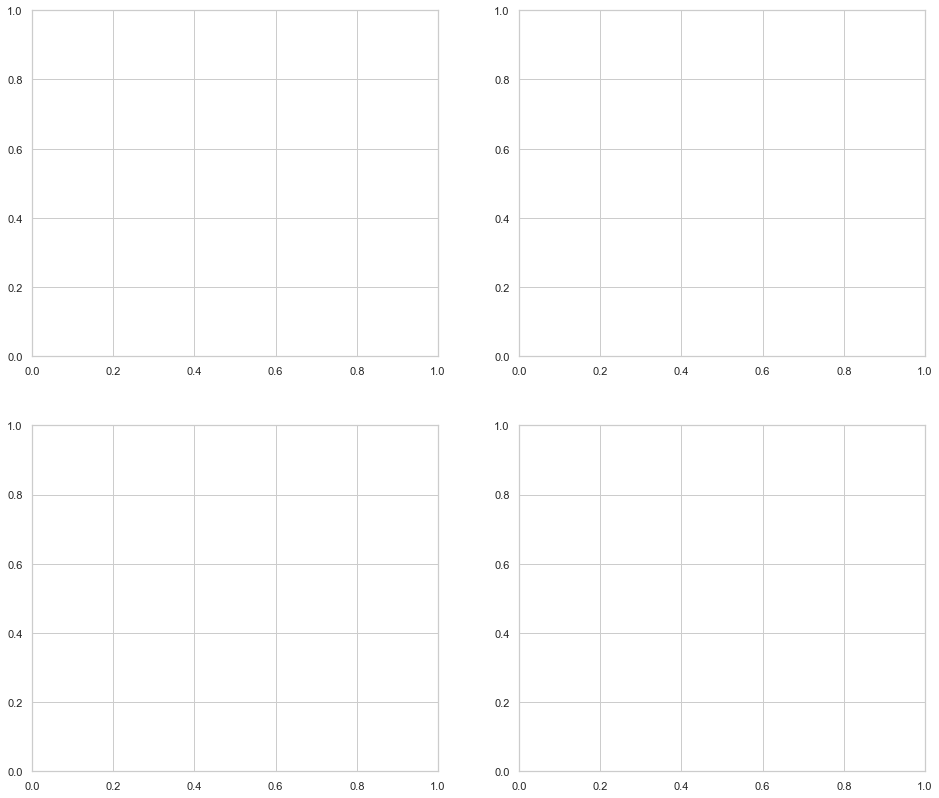

In [46]:

sns.set(rc={'figure.figsize':(16, 14)})
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,2)

whisker = 0#1.5

lw=0.5
w = 1

"""
Maximum entropy
"""
prefix_plot = prefix_all.loc[prefix_all.number_of_traces == 1000]
prefix_plot = prefix_plot.loc[prefix_plot.statespace_size == 5]
prefix_plot = prefix_plot.loc[prefix_plot.process_entropy == "med_entropy"]

sns.boxplot('event_no','freq',
            hue="process_type",
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 3], 
              ax=ax[0,0])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 3].event_no))

sns.boxplot('event_no','freq',
            hue="process_type",
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 5], 
              ax=ax[0,1])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 5].event_no))


ax[0,0].set(ylabel='Frequency', xlabel='', title="statespace_size = 5, num_transitions = 3", xlim=[0,107])
ax[0,0].legend(loc='upper right')
ax[0,1].set(ylabel='', xlabel='', title="statespace_size = 5, num_transitions = 5", xlim=[0,54])
ax[0,1].legend([],[], frameon=False)





"""
Medium entropy
"""

prefix_plot = prefix_all.loc[prefix_all.number_of_traces == 1000]
prefix_plot = prefix_plot.loc[prefix_plot.statespace_size == 10]
prefix_plot = prefix_plot.loc[prefix_plot.process_entropy == "med_entropy"]

sns.boxplot('event_no','freq',
            hue="process_type",
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 3], 
              ax=ax[1,0])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 3].event_no))

sns.boxplot('event_no','freq',
            hue="process_type",
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 5], 
              ax=ax[1,1])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 5].event_no))


ax[1,0].set(ylabel='Frequency', xlabel='', title="statespace_size = 10, num_transitions = 3", xlim=[0,240])
ax[1,0].legend([],[], frameon=False)
ax[1,1].set(ylabel='', xlabel='', title="statespace_size = 10, num_transitions = 5", xlim=[0,111])
ax[1,1].legend([],[], frameon=False)






"""
Set tickmarks
"""

ax[0,0].set_xticks(np.array([0,1,2,3,4,5,6,7,8,9,10])*11)
ax[0,1].set_xticks(np.array([0,1,2,3,4,5,6,7,8,9,10])*6)
ax[1,0].set_xticks(np.array([0,1,2,3,4,5,6,7,8,9,10])*24)
ax[1,1].set_xticks(np.array([0,1,2,3,4,5,6,7,8,9,10])*11)

#plot_.xaxis.set_major_locator(ticker.LinearLocator(10))

plt.savefig("event_frequency_vs_.png", dpi=200, bbox_inches = "tight")

fig.show()

In [ ]:
"""
Explanation: 

Fewer transitions will lead to more bouncing back and forth between states, "getting stuck" so to say.

"""

# Event frequency vs. Entropy vs. Number of transitions
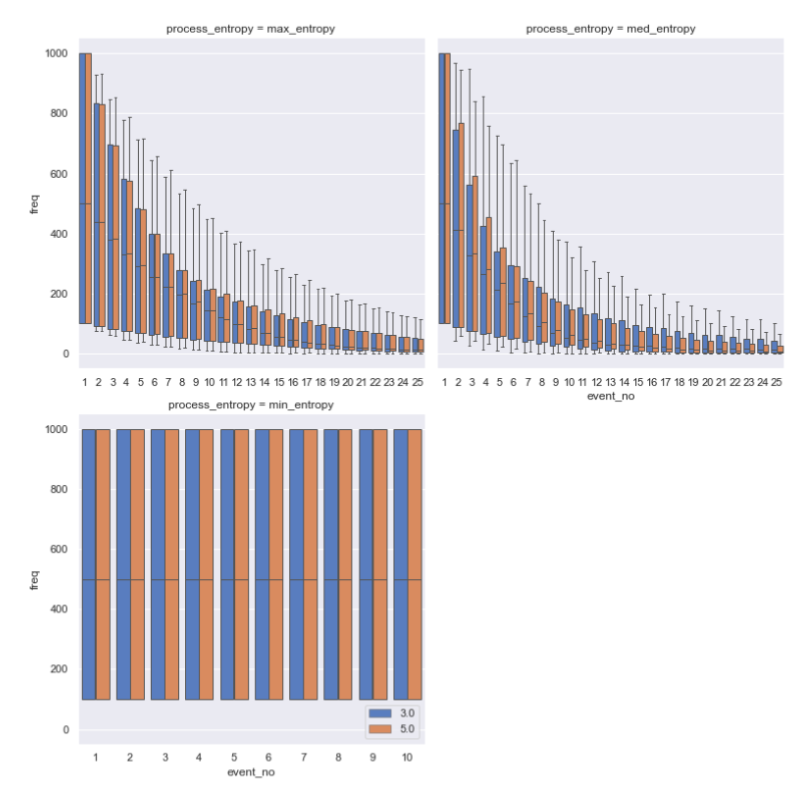

In [48]:
# key = old name
# value = new name
dict = {'activity_no': 'freq',
        'transitions': 'num_transitions'}
  
# call rename () method
prefix_all.rename(columns=dict,
          inplace=True)

In [49]:
prefix_all.columns

Index(['freq', 'event_no', 'num_transitions', 'process_entropy',
       'process_type', 'statespace_size', 'number_of_traces'],
      dtype='object')

In [50]:
prefix_all

,freq,event_no,num_transitions,process_entropy,process_type,statespace_size,number_of_traces
0,100,1,3.0,min_entropy,memoryless,5,100.0
1,100,2,3.0,min_entropy,memoryless,5,100.0
2,100,3,3.0,min_entropy,memoryless,5,100.0
3,100,4,3.0,min_entropy,memoryless,5,100.0
4,100,5,3.0,min_entropy,memoryless,5,100.0
...,...,...,...,...,...,...,...
48509,625,6,5.0,max_entropy,memory,10,1000.0
48510,564,7,5.0,max_entropy,memory,10,1000.0
48511,516,8,5.0,max_entropy,memory,10,1000.0
48512,470,9,5.0,max_entropy,memory,10,1000.0


C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


10
10
10


C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


10


C:\Users\Mike\AppData\Local\Temp\ipykernel_10844\3802462843.py:101: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


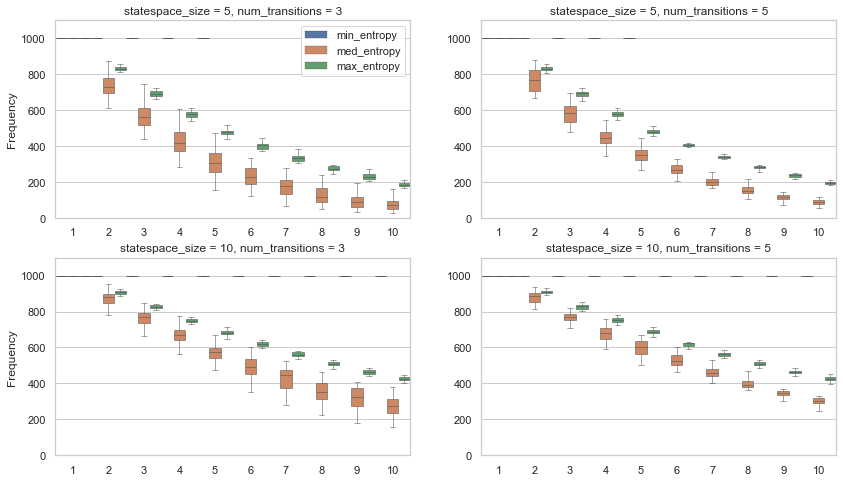

In [76]:

sns.set(rc={'figure.figsize':(14, 8)})
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,2)

whisker = 1.5

lw=0.5
w = 1

"""
subsetting
"""

prefix25 = prefix_all.loc[prefix_all.event_no < 26] 
prefix25 = prefix25.loc[prefix25.number_of_traces == 1000] 
entropy = "max_entropy"#"med_entropy"
huevar = "process_entropy" #"process_type"
memory = "memory" #process_type

"""
Maximum entropy
"""
prefix_plot = prefix25.loc[prefix25.statespace_size == 5]
prefix_plot = prefix_plot.loc[prefix_plot.process_type == memory]

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 3], 
              ax=ax[0,0])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 3].event_no))

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 5], 
              ax=ax[0,1])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 5].event_no))


ax[0,0].set(ylabel='Frequency', xlabel='', title="statespace_size = 5, num_transitions = 3", ylim=[0,1100])
ax[0,0].legend(loc='upper right')
ax[0,1].set(ylabel='', xlabel='', title="statespace_size = 5, num_transitions = 5", ylim=[0,1100])
ax[0,1].legend([],[], frameon=False)





"""
Medium entropy
"""

prefix_plot = prefix25.loc[prefix25.statespace_size == 10]
prefix_plot = prefix_plot.loc[prefix_plot.process_type == memory]

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 3], 
              ax=ax[1,0])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 3].event_no))

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 5], 
              ax=ax[1,1])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 5].event_no))


ax[1,0].set(ylabel='Frequency', xlabel='', title="statespace_size = 10, num_transitions = 3", ylim=[0,1100])
ax[1,0].legend([],[], frameon=False)
ax[1,1].set(ylabel='', xlabel='', title="statespace_size = 10, num_transitions = 5", ylim=[0,1100])
ax[1,1].legend([],[], frameon=False)




#plot_.xaxis.set_major_locator(ticker.LinearLocator(10))

plt.savefig("event_frequency_vs_memory.png", dpi=200, bbox_inches = "tight")

fig.show()

C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


25


C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


25


C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


25


C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


25


C:\Users\Mike\AppData\Local\Temp\ipykernel_10844\2551265946.py:100: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


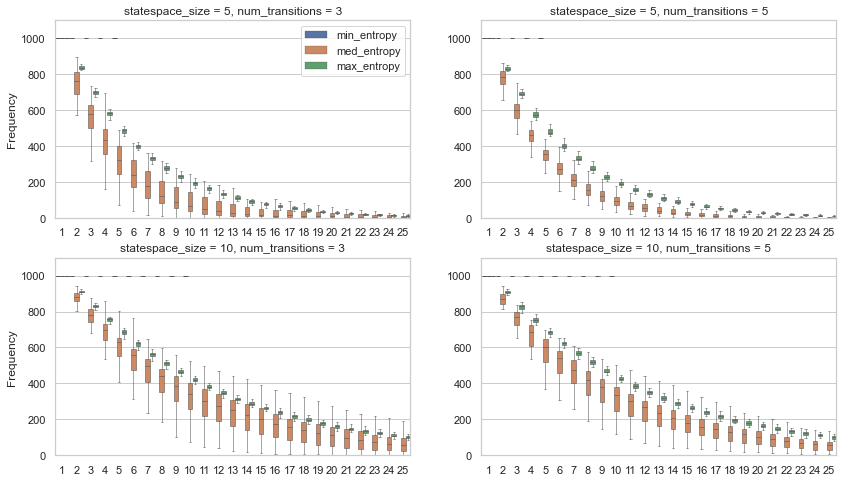

In [77]:

sns.set(rc={'figure.figsize':(14, 8)})
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,2)

whisker = 1.5

lw=0.5
w = 1

"""
subsetting
"""

prefix25 = prefix_all.loc[prefix_all.event_no < 26] 
prefix25 = prefix25.loc[prefix25.number_of_traces == 1000] 
entropy = "max_entropy"#"med_entropy"
huevar = "process_entropy" #"process_type"
memory = "memoryless" #process_type

"""
Maximum entropy
"""
prefix_plot = prefix25.loc[prefix25.statespace_size == 5]
prefix_plot = prefix_plot.loc[prefix_plot.process_type == memory]

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 3], 
              ax=ax[0,0])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 3].event_no))

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 5], 
              ax=ax[0,1])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 5].event_no))


ax[0,0].set(ylabel='Frequency', xlabel='', title="statespace_size = 5, num_transitions = 3", ylim=[0,1100])
ax[0,0].legend(loc='upper right')
ax[0,1].set(ylabel='', xlabel='', title="statespace_size = 5, num_transitions = 5", ylim=[0,1100])
ax[0,1].legend([],[], frameon=False)





"""
Medium entropy
"""

prefix_plot = prefix25.loc[prefix25.statespace_size == 10]
prefix_plot = prefix_plot.loc[prefix_plot.process_type == memory]

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 3], 
              ax=ax[1,0])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 3].event_no))

sns.boxplot('event_no','freq',
            hue=huevar,
            width=w,
            dodge=True,
            showfliers = False,
            linewidth=lw,
            whis=whisker,
              data=prefix_plot.loc[prefix_plot.num_transitions == 5], 
              ax=ax[1,1])
print(np.max(prefix_plot.loc[prefix_plot.num_transitions == 5].event_no))


ax[1,0].set(ylabel='Frequency', xlabel='', title="statespace_size = 10, num_transitions = 3", ylim=[0,1100])
ax[1,0].legend([],[], frameon=False)
ax[1,1].set(ylabel='', xlabel='', title="statespace_size = 10, num_transitions = 5", ylim=[0,1100])
ax[1,1].legend([],[], frameon=False)



#plot_.xaxis.set_major_locator(ticker.LinearLocator(10))

plt.savefig("event_frequency_vs_memoryless.png", dpi=200, bbox_inches = "tight")

fig.show()

# Tables with descriptives

In [78]:
prefix_all.head()

,freq,event_no,num_transitions,process_entropy,process_type,statespace_size,number_of_traces
0,100,1,3.0,min_entropy,memoryless,5,100.0
1,100,2,3.0,min_entropy,memoryless,5,100.0
2,100,3,3.0,min_entropy,memoryless,5,100.0
3,100,4,3.0,min_entropy,memoryless,5,100.0
4,100,5,3.0,min_entropy,memoryless,5,100.0


In [79]:
results.head()

,save_eventlog,statespace_size,number_of_traces,process_entropy,process_type,process_memory,PS_med_ent_e_steps,PS_med_ent_n_transitions,PS_med_ent_max_trials,TS_inter_arrival_time,...,res_mean_v_t,res_act_start_mon,res_act_start_tue,res_act_start_wed,res_act_start_thu,res_act_start_fri,res_act_start_sat,res_act_start_sun,res_act_start_0_12,res_act_start_12_24
0,1.0,5,100.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.691333,148,97,96,73,86,0,0,0,500
1,1.0,10,100.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.648093,278,184,178,185,175,0,0,0,1000
2,1.0,5,500.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.464466,689,575,470,407,359,0,0,0,2500
3,1.0,10,500.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.507307,1244,1107,980,879,790,0,0,1,4999
4,1.0,5,1000.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,0.458297,1551,1056,917,794,682,0,0,0,5000


In [ ]:
pd.pivot_table(results,
                    values='a_max_events', 
                    index=['process_type','process_entropy','statespace_size',"process_memory"], 
                    columns=['PS_med_ent_e_steps', 'PS_med_ent_n_transitions'], 
                    aggfunc=[#np.max,
                             #np.min,
                             #len,
                             np.mean])

In [87]:
pd.pivot_table(results,
                    values='a_max_events', 
                    index=['statespace_size','process_type'], 
                    columns=['process_entropy'],#'statespace_size', 'process_memory'], 
                    aggfunc=[np.max,
                             #np.min,
                             #len,
                             #np.mean
                            ])

amax                        
process_entropy              max_entropy med_entropy min_entropy
statespace_size process_type                                    
5               memory                10          10           5
                memoryless            72         107           5
10              memory                10          10          10
                memoryless           132         952          10

In [24]:
# key = old name
# value = new name
dict = {'activity_no': 'freq',
        'transitions': 'num_transitions'}
  
# call rename () method
prefix_all.rename(columns=dict,
          inplace=True)

In [25]:
prefix_all.columns

Index(['freq', 'event_no', 'num_transitions', 'process_entropy',
       'process_type', 'statespace_size', 'number_of_traces'],
      dtype='object')

C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


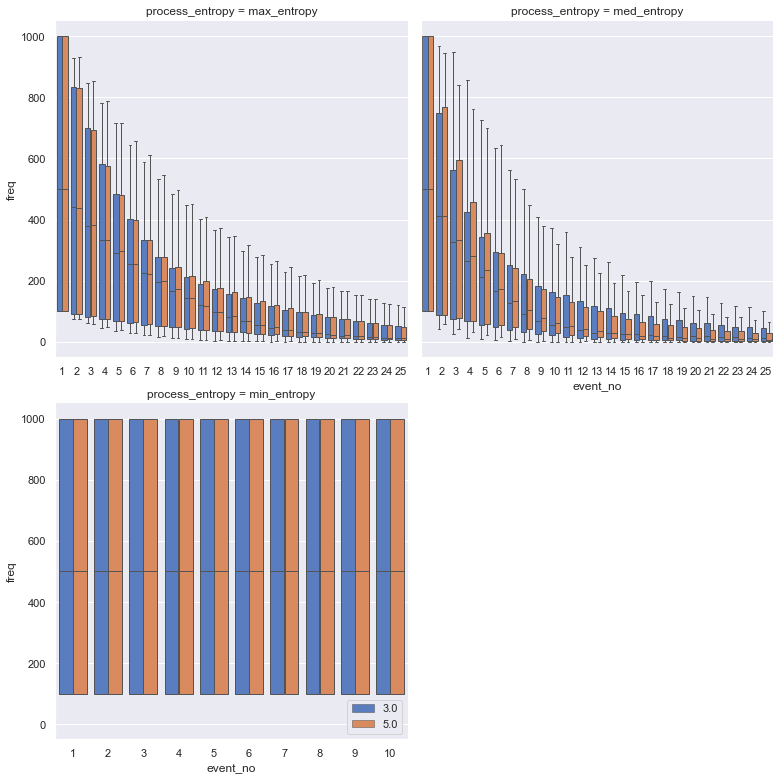

In [26]:
grouping_variable = "process_entropy"

import seaborn as sns, matplotlib.pyplot as plt
#sns.set(style="whitegrid")

data = prefix_all.loc[prefix_all.event_no< 26]
ordered_data = sorted(data[grouping_variable].unique())

g = sns.FacetGrid(data,col=grouping_variable, 
                  col_order=ordered_data, 
                  col_wrap=2,
                  aspect=1,
                  height=5.5, 
                  legend_out=False,# xlim=5,
                  sharex=False)


g.map(sns.boxplot,'event_no','freq',"num_transitions",
      fliersize=0.0,
      width=0.8, 
      linewidth=1,
      saturation=0.75,
      palette='muted')

#g.despine(left=True)


#for ax in g.axes.flatten(): 
#    ax.tick_params(labelbottom=True)

plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig("Prefix_freq_"+grouping_variable+".png")
plt.show()

C:\Users\Mike\anaconda3\envs\TF2_CUD11_CRM_PAPER\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Mike\anaconda3\envs\TF2_CUD11_CRM_PAPER\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


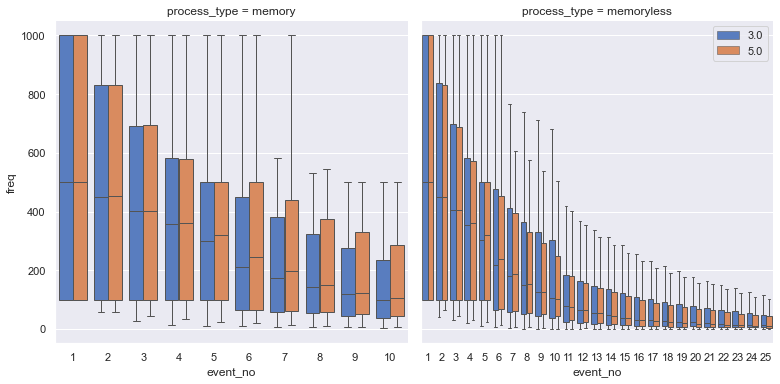

In [203]:
grouping_variable = "process_type"

import seaborn as sns, matplotlib.pyplot as plt
#sns.set(style="whitegrid")

data = prefix_all.loc[prefix_all.event_no< 26]
ordered_data = sorted(data[grouping_variable].unique())

g = sns.FacetGrid(data,col=grouping_variable, 
                  col_order=ordered_data, 
                  col_wrap=2,
                  aspect=1,
                  height=5.5, 
                  legend_out=False,# xlim=5,
                  sharex=False)


g.map(sns.boxplot,'event_no','freq',"num_transitions",
      fliersize=0.0,
      width=0.8, 
      linewidth=1,
      saturation=0.75,
      palette='muted')

#g.despine(left=True)


#for ax in g.axes.flatten(): 
#    ax.tick_params(labelbottom=True)

plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("Prefix_freq_"+grouping_variable+".png")
plt.show()

Text(0.5, 1.0, 'Prefix_freq')

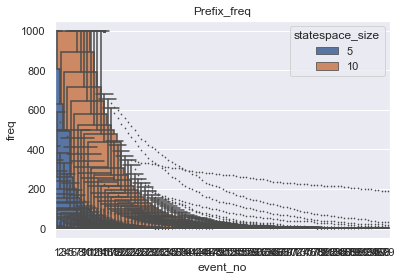

In [204]:
data = prefix_all.loc[prefix_all.event_no< 100]

ax = sns.boxplot(x="event_no", y="freq", hue="statespace_size", 
    width=20, 
                 fliersize=0.8,
                 data=data)#,fliersize=0.0)

ax.set_title("Prefix_freq")
#ax.set_ylabel(target)

In [ ]:
prefix_all.columns

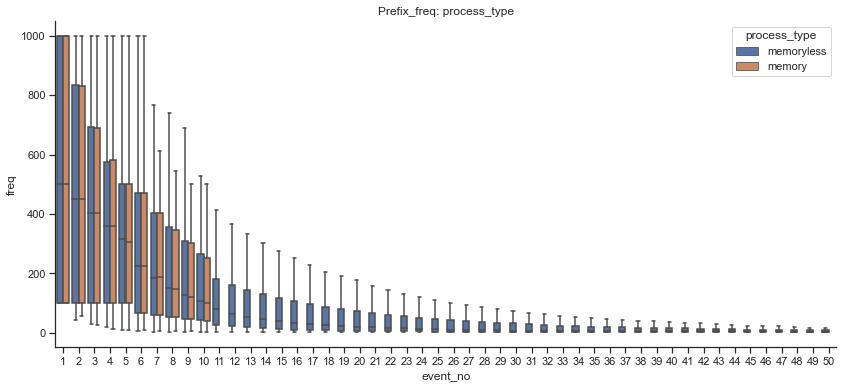

In [205]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

variable = ['num_transitions', 'process_entropy', 'process_type',
                                       'statespace_size', 'number_of_traces'][2]

# plot
sns.set_style('ticks')
fig, ax = plt.subplots()

# the size of A4 paper
fig.set_size_inches(14, 6)

#sns.violinplot(data=data, inner="points", ax=ax) 

data = prefix_all.loc[prefix_all.event_no< 51]

sns.boxplot(x="event_no", y="freq", hue=variable,
    ax=ax, 
                 fliersize=0.0,
                 data=data)#,fliersize=0.0)
sns.despine()
ax.set_title("Prefix_freq: "+variable)

fig.savefig('Prefix_all'+variable+'.png')

Text(0.5, 1.0, 'event_no_freq: statespace_size')

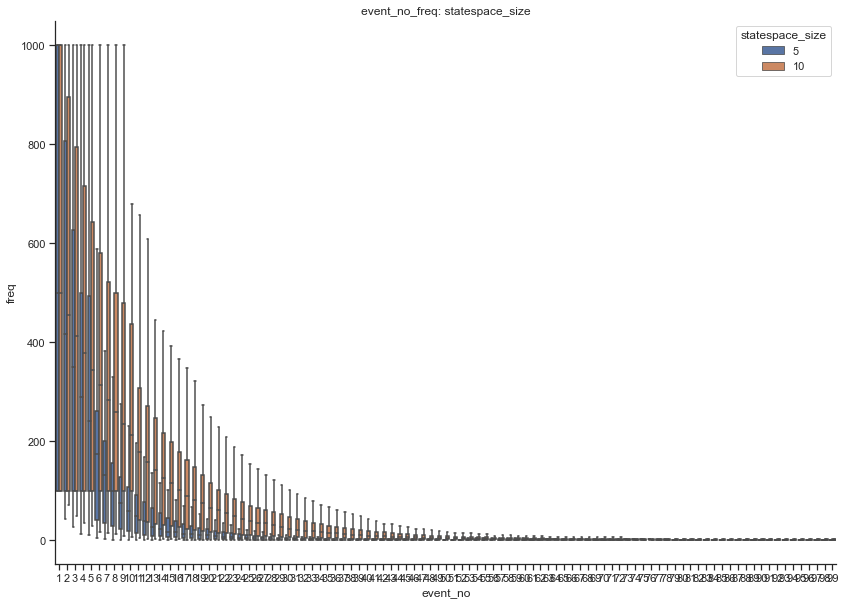

In [206]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

variable = ['num_transitions', 'process_entropy', 'process_type',
                                       'statespace_size', 'number_of_traces'][3]

# plot
sns.set_style('ticks')
fig, ax = plt.subplots()

# the size of A4 paper
fig.set_size_inches(14, 10)

#sns.violinplot(data=data, inner="points", ax=ax) 

data = prefix_all.loc[prefix_all.event_no< 100]

sns.boxplot(x="event_no", y="freq", hue=variable,
    ax=ax, 
                 fliersize=0.0,
                 data=data)#,fliersize=0.0)
sns.despine()
ax.set_title("event_no_freq: "+variable)

#fig.savefig('Prefix_all'+variable+'.png')

# Duration: prefix-level

In [207]:
#df['activity_no'].value_counts().index

prefix = pd.pivot_table(df, values='Y', index=['activity_no'], 
                    #columns=['activity_no'], 
                       aggfunc=np.mean)

prefix["event_no"] = prefix.index
prefix = prefix.reset_index(drop=True)
prefix = prefix.rename(columns={"Y": "Y_avg"})

table

,Y_avg,prefix
0,759.821402,1
1,771.105096,2
2,769.917437,3
3,779.191856,4
4,783.067398,5
5,785.719055,6
6,782.153419,7
7,784.620057,8
8,782.623780,9
9,776.795247,10


In [208]:
for run in results.run:
    #get filename strings
    process_entropy = results.loc[results.run==run].process_entropy.values[0]
    process_type = results.loc[results.run==run].process_type.values[0]
    
    transitions = results.loc[results.run==run].PS_med_ent_n_transitions.values[0] 
    process_type = results.loc[results.run==run].process_type.values[0] 
    statespace_size = results.loc[results.run==run].statespace_size.values[0] 
    number_of_traces = results.loc[results.run==run].number_of_traces.values[0] 
    
    #load eventlog
    df = pd.read_csv("A:/Process_sim/"+str(run)+"_Eventlog_"+process_entropy+"_"+process_type+".csv")
    
    prefix = pd.pivot_table(df, values='Y', index=['activity_no'], 
                    #columns=['activity_no'], 
                       aggfunc=np.mean)

    prefix["event_no"] = prefix.index
    prefix = prefix.reset_index(drop=True)
    prefix = prefix.rename(columns={"Y": "Y_avg"})
    
    prefix["Y_avg_log"] = np.log(prefix["Y_avg"])
    
    prefix["transitions"] = transitions
    prefix["process_entropy"] = process_entropy
    prefix["process_type"] = process_type
    prefix["statespace_size"] = statespace_size
    prefix["number_of_traces"] = number_of_traces
    
    if run == results.run[0]:
        prefix_all_duration = prefix
    else:
        prefix_all_duration = pd.concat([prefix_all_duration, prefix],axis=0,ignore_index=True)

prefix_all_duration.to_csv("prefix_all_duration.csv",index=False)
prefix_all_duration

,Y_avg,event_no,Y_avg_log,transitions,process_entropy,process_type,statespace_size,number_of_traces
0,89.474750,1,4.493956,3.0,min_entropy,memoryless,5,100.0
1,90.646750,2,4.506970,3.0,min_entropy,memoryless,5,100.0
2,91.580933,3,4.517223,3.0,min_entropy,memoryless,5,100.0
3,92.757589,4,4.529990,3.0,min_entropy,memoryless,5,100.0
4,93.339345,5,4.536242,3.0,min_entropy,memoryless,5,100.0
...,...,...,...,...,...,...,...,...
48509,785.719055,6,6.666599,5.0,max_entropy,memory,10,1000.0
48510,782.153419,7,6.662051,5.0,max_entropy,memory,10,1000.0
48511,784.620057,8,6.665200,5.0,max_entropy,memory,10,1000.0
48512,782.623780,9,6.662652,5.0,max_entropy,memory,10,1000.0


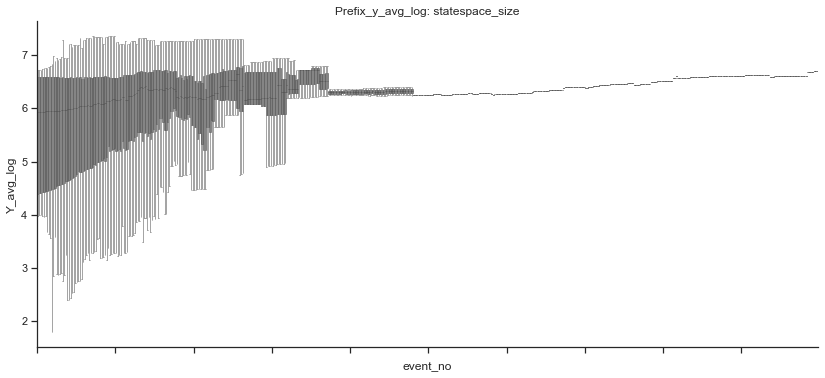

In [209]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

variable = ['transitions', 'process_entropy', 'process_type',
                                       'statespace_size', 'number_of_traces'][3]

# plot
sns.set_style('ticks')
fig, ax = plt.subplots()

#fiddling with the x axis
ax.set(xlim=(1, 40))


# the size of A4 paper
fig.set_size_inches(14, 6)

#sns.violinplot(data=data, inner="points", ax=ax) 

data = prefix_all_duration.loc[prefix_all_duration.event_no< 500]

sns.boxplot(x="event_no", y="Y_avg_log", #hue=variable,
                ax=ax, 
                 fliersize=0.0,
                 linewidth=0.5,
                 color="grey",
                 data=data)#,fliersize=0.0)
sns.despine()
ax.set_title("Prefix_y_avg_log: "+variable)


#fiddling with the x axis
start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 5))
ax.xaxis.set_ticks(np.arange(start, end, 50))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%")) #".1f ".01f"

fig.savefig('Prefix_all_duration_0_500_log.png',dpi=100)

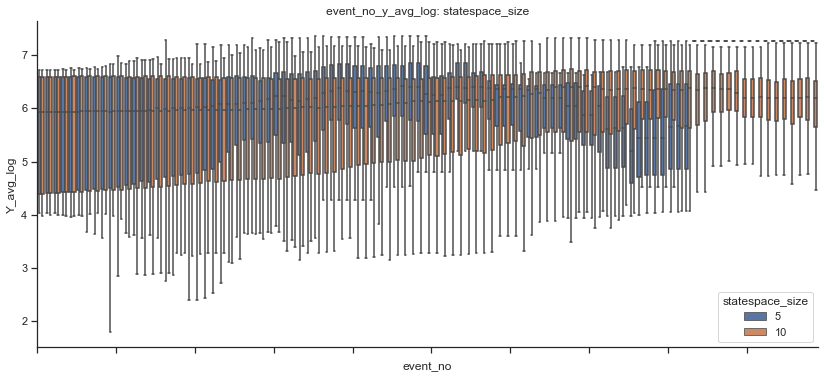

In [210]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

variable = ['transitions', 'process_entropy', 'process_type',
                                       'statespace_size', 'number_of_traces'][3]

# plot
sns.set_style('ticks')
fig, ax = plt.subplots()

#fiddling with the x axis
ax.set(xlim=(1, 40))


# the size of A4 paper
fig.set_size_inches(14, 6)

#sns.violinplot(data=data, inner="points", ax=ax) 

data = prefix_all_duration.loc[prefix_all_duration.event_no< 100]

sns.boxplot(x="event_no", y="Y_avg_log", hue=variable,
    ax=ax, 
                 fliersize=0.0,
                 data=data)#,fliersize=0.0)
sns.despine()
ax.set_title("event_no_y_avg_log: "+variable)


#fiddling with the x axis
start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 5))
ax.xaxis.set_ticks(np.arange(start, end, 10))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%")) #".1f ".01f"

fig.savefig('Prefix_all_duration_0_100_log.png',dpi=100)

### No log

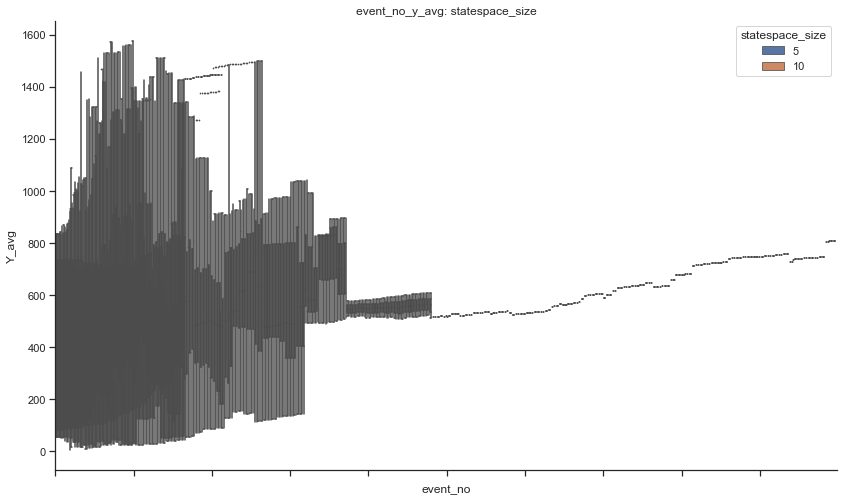

In [211]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

variable = ['transitions', 'process_entropy', 'process_type',
                                       'statespace_size', 'number_of_traces'][3]

# plot
sns.set_style('ticks')
fig, ax = plt.subplots()

#fiddling with the x axis
ax.set(xlim=(1, 40))


# the size of A4 paper
fig.set_size_inches(14, 8.27)

#sns.violinplot(data=data, inner="points", ax=ax) 

data = prefix_all_duration.loc[prefix_all_duration.event_no< 500]

sns.boxplot(x="event_no", y="Y_avg", hue=variable,
    ax=ax, 
                 fliersize=0.8,
                 data=data)#,fliersize=0.0)
sns.despine()
ax.set_title("event_no_y_avg: "+variable)


#fiddling with the x axis
start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 5))
ax.xaxis.set_ticks(np.arange(start, end, 50))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%")) #".1f ".01f"

fig.savefig('Prefix_all_duration_0_500.png')

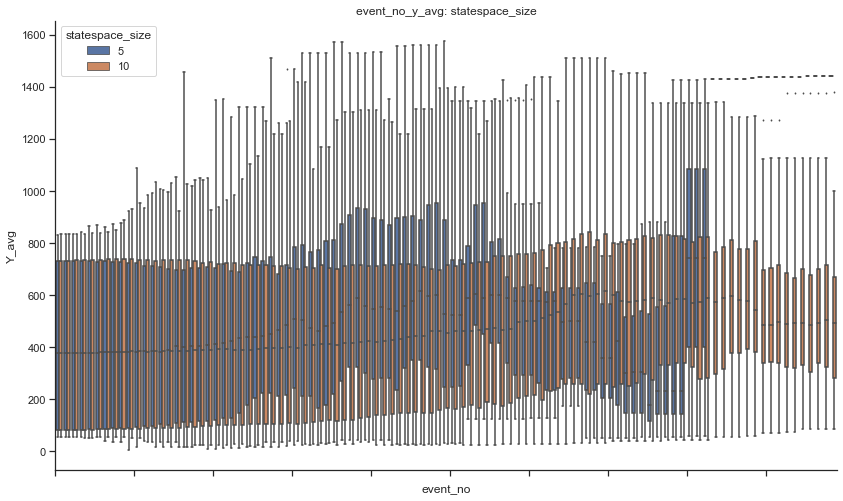

In [212]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

variable = ['transitions', 'process_entropy', 'process_type',
                                       'statespace_size', 'number_of_traces'][3]

# plot
sns.set_style('ticks')
fig, ax = plt.subplots()

#fiddling with the x axis
ax.set(xlim=(1, 40))


# the size of A4 paper
fig.set_size_inches(14, 8.27)

#sns.violinplot(data=data, inner="points", ax=ax) 

data = prefix_all_duration.loc[prefix_all_duration.event_no< 100]

sns.boxplot(x="event_no", y="Y_avg", hue=variable,
    ax=ax, 
                 fliersize=1,
                 data=data)#,fliersize=0.0)
sns.despine()
ax.set_title("event_no_y_avg: "+variable)


#fiddling with the x axis
start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 5))
ax.xaxis.set_ticks(np.arange(start, end, 10))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%")) #".1f ".01f"

fig.savefig('Prefix_all_duration_0_100.png')

# Duration distributions (one single event-log)


- Does the various time components match their specified distributions?


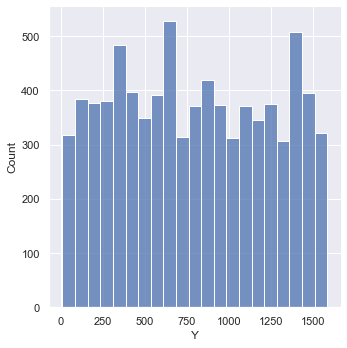

In [389]:
sns.displot(
    df, 
    x="Y",#"a_max_events", 
    #col="TS_activity_duration_lambda_range", 
    #hue="process_type",
    #row="process_entropy",
    #binwidth=1000, 
    height=5, 
    facet_kws=dict(margin_titles=True),
)

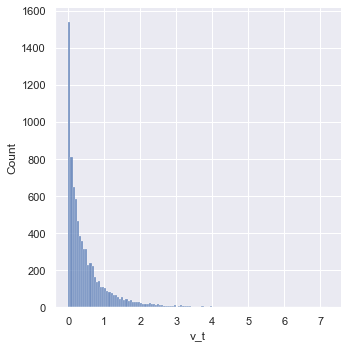

In [390]:
sns.displot(
    df, 
    x="v_t",
    height=5, 
    facet_kws=dict(margin_titles=True),
)

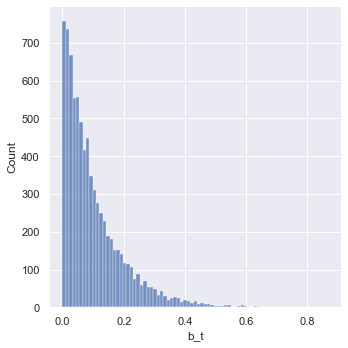

In [391]:
sns.displot(
    df, 
    x="b_t",
    height=5, 
    facet_kws=dict(margin_titles=True),
)

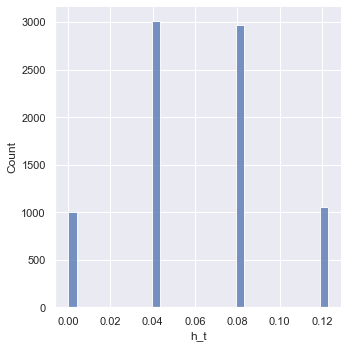

In [392]:
sns.displot(
    df, 
    x="h_t",
    height=5, 
    facet_kws=dict(margin_titles=True),
)

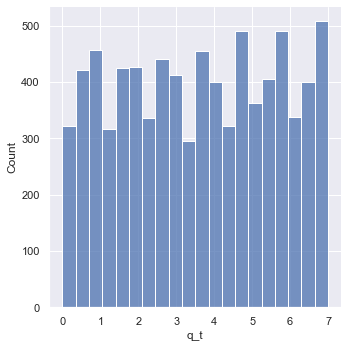

In [393]:
sns.displot(
    df, 
    x="q_t",
    height=5, 
    facet_kws=dict(margin_titles=True),
)

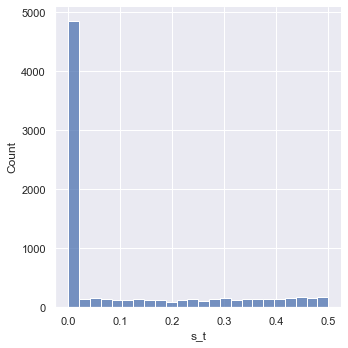

In [394]:
sns.displot(
    df, 
    x="s_t",
    height=5, 
    facet_kws=dict(margin_titles=True),
)

- Does the arrival times look exponential?

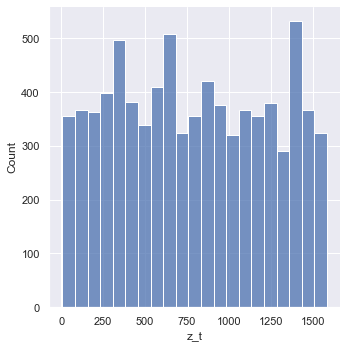

In [395]:
sns.displot(
    df, 
    x="z_t",
    height=5, 
    facet_kws=dict(margin_titles=True),
)

In [396]:
results.T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
save_eventlog,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
statespace_size,3,5,8,3,5,8,3,5,8,3,...,8,3,5,8,3,5,8,3,5,8
number_of_traces,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
process_entropy,min_entropy,min_entropy,min_entropy,med_entropy,med_entropy,med_entropy,max_entropy,max_entropy,max_entropy,min_entropy,...,max_entropy,min_entropy,min_entropy,min_entropy,med_entropy,med_entropy,med_entropy,max_entropy,max_entropy,max_entropy
process_type,memoryless,memoryless,memoryless,memoryless,memoryless,memoryless,memoryless,memoryless,memoryless,memory,...,memoryless,memory,memory,memory,memory,memory,memory,memory,memory,memory
process_memory,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
PS_med_ent_e_steps,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PS_med_ent_n_transitions,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
PS_med_ent_max_trials,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
TS_inter_arrival_time,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,...,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5


- Does weekdays match the desired business hours?

In [397]:
print("Activity start date: Average occurrences across event logs\n")
print("mon",np.mean(results.loc[results.Deterministic_offset_type_W=="weekdays","res_act_start_mon"]))
print("tue",np.mean(results.loc[results.Deterministic_offset_type_W=="weekdays","res_act_start_tue"]))
print("wed",np.mean(results.loc[results.Deterministic_offset_type_W=="weekdays","res_act_start_wed"]))
print("thu",np.mean(results.loc[results.Deterministic_offset_type_W=="weekdays","res_act_start_thu"]))
print("fri",np.mean(results.loc[results.Deterministic_offset_type_W=="weekdays","res_act_start_fri"]))
print("sat",np.mean(results.loc[results.Deterministic_offset_type_W=="weekdays","res_act_start_sat"]))
print("sun",np.mean(results.loc[results.Deterministic_offset_type_W=="weekdays","res_act_start_sun"]))


Activity start date: Average occurrences across event logs

mon 1493.888888888889
tue 1010.9444444444445
wed 932.3888888888889
thu 878.7222222222222
fri 848.5
sat 0.0
sun 0.0


In [409]:
print("Activity start date: Average occurrences across event logs\n")
print("mon",np.mean(results.loc[results.Deterministic_offset_type_W=="all-week","res_act_start_mon"]))
print("tue",np.mean(results.loc[results.Deterministic_offset_type_W=="all-week","res_act_start_tue"]))
print("wed",np.mean(results.loc[results.Deterministic_offset_type_W=="all-week","res_act_start_wed"]))
print("thu",np.mean(results.loc[results.Deterministic_offset_type_W=="all-week","res_act_start_thu"]))
print("fri",np.mean(results.loc[results.Deterministic_offset_type_W=="all-week","res_act_start_fri"]))
print("sat",np.mean(results.loc[results.Deterministic_offset_type_W=="all-week","res_act_start_sat"]))
print("sun",np.mean(results.loc[results.Deterministic_offset_type_W=="all-week","res_act_start_sun"]))


Activity start date: Average occurrences across event logs

mon 743.3888888888889
tue 756.8333333333334
wed 746.3333333333334
thu 739.1666666666666
fri 741.5
sat 760.7777777777778
sun 740.3333333333334


In [398]:
print("Activity start time: Average occurrances across event logs\n")
print("00-12:",np.sum(results.loc[results.Deterministic_offset_type_W=="weekdays","res_act_start_0_12"]))
print("12-24:",np.sum(results.loc[results.Deterministic_offset_type_W=="weekdays","res_act_start_12_24"]))

Activity start time: Average occurrances across event logs

00-12: 0
12-24: 92960


In [399]:
print("Activity start time: Average occurrances across event logs\n")
print("00-12:",np.sum(results.loc[results.Deterministic_offset_type_W=="all-week","res_act_start_0_12"]))
print("12-24:",np.sum(results.loc[results.Deterministic_offset_type_W=="all-week","res_act_start_12_24"]))

Activity start time: Average occurrances across event logs

00-12: 11
12-24: 94099


### Conclusions: 
- The deterministic offsets are not acting as expected
    - No activities should start at Saturday or sunday
    - From 00.00 to 12.00 no cases should be able to start
- There is possibly a mistake in the duration code

# Simulation duration

In [56]:
results.columns

Index(['save_eventlog', 'statespace_size', 'number_of_traces',
       'process_entropy', 'process_type', 'process_memory',
       'PS_med_ent_e_steps', 'PS_med_ent_n_transitions',
       'PS_med_ent_max_trials', 'TS_inter_arrival_time',
       'TS_process_stability_scale', 'TS_resource_availability_p',
       'TS_resource_availability_n', 'TS_resource_availability_m',
       'TS_activity_duration_lambda_range', 'Deterministic_offset_type_W',
       'Deterministic_offset_u', 'repetitions', 'Name_fix', 'RUN', 'Done',
       'Failure', 'run', 'simulation_time', 'statespace', 'a_n_cases',
       'a_n_events', 'a_min_events', 'a_mean_events', 'a_median_events',
       'a_max_events', 'res_mean_y_acc_sum', 'res_mean_Y', 'res_mean_X',
       'res_mean_z_t', 'res_mean_h_t', 'res_mean_b_t', 'res_mean_q_t',
       'res_mean_s_t', 'res_mean_v_t', 'res_act_start_mon',
       'res_act_start_tue', 'res_act_start_wed', 'res_act_start_thu',
       'res_act_start_fri', 'res_act_start_sat', 'res_act_sta

In [80]:
pivot = results.pivot_table(values="simulation_time", 
                            index=["statespace_size",'process_entropy', 'process_type'], #, 'PS_med_ent_n_transitions'
                            columns="number_of_traces", aggfunc='median')
pivot

number_of_traces                                100.0     500.0     1000.0
statespace_size process_entropy process_type                              
5               max_entropy     memory        0.258824  1.303100  2.595663
                                memoryless    0.273280  1.341003  2.715431
                med_entropy     memory        0.245610  1.166955  2.297261
                                memoryless    0.232390  1.128030  2.248578
                min_entropy     memory        0.287259  1.420583  2.850639
                                memoryless    0.251339  1.216856  2.453686
10              max_entropy     memory        0.298721  1.499051  2.997017
                                memoryless    0.413433  1.986626  4.043842
                med_entropy     memory        0.288772  1.290889  2.732721
                                memoryless    0.333388  1.668107  3.502363
                min_entropy     memory        0.375013  1.860634  3.733298
                                memoryless    0.376009  1.865890  3.780795

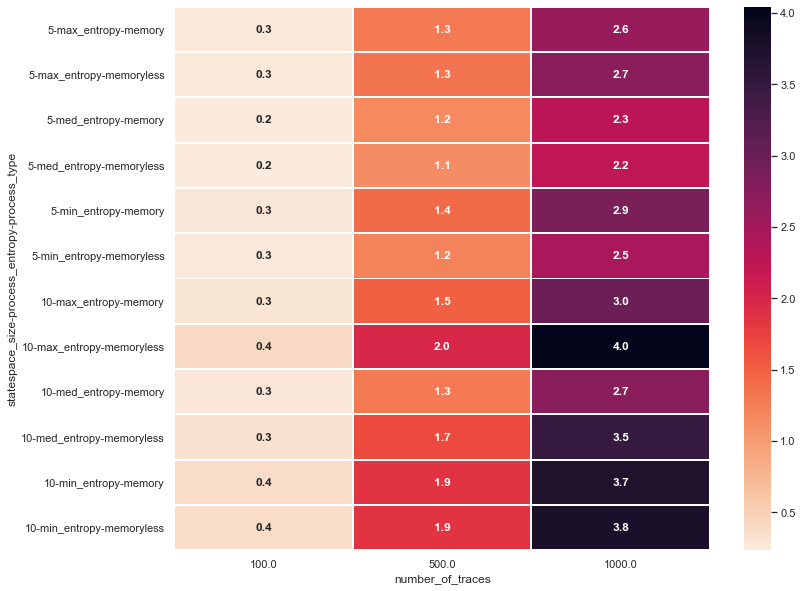

In [83]:
##### HEATMAP

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 10))

cmap = sns.cm.rocket_r

fig = sns.heatmap(pivot, 
            cmap=cmap,
            annot=True, 
            fmt=".1f",#fmt=".2g",
            annot_kws={"weight": "bold"}, #"style": "italic",
            #mt="d", 
            linewidths=1, 
            ax=ax)

plt.savefig('Simulation_durations.png')

# Control-flows
- Entropy settings and process memory vs. Control flows

In [123]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter 
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.objects.conversion.process_tree import converter as pt_converter
import pm4py

In [151]:
experiments

,save_eventlog,statespace_size,number_of_traces,process_entropy,process_type,process_memory,PS_med_ent_e_steps,PS_med_ent_n_transitions,PS_med_ent_max_trials,TS_inter_arrival_time,...,TS_resource_availability_n,TS_resource_availability_m,TS_activity_duration_lambda_range,Deterministic_offset_type_W,Deterministic_offset_u,repetitions,Name_fix,RUN,Done,Failure
0,1.0,5,100.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,3.0,0.041,1.0,weekdays,7.0,1.0,1,1,1,0
1,1.0,10,100.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,3.0,0.041,1.0,weekdays,7.0,1.0,1,2,1,0
2,1.0,5,500.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,3.0,0.041,1.0,weekdays,7.0,1.0,1,3,1,0
3,1.0,10,500.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,3.0,0.041,1.0,weekdays,7.0,1.0,1,4,1,0
4,1.0,5,1000.0,min_entropy,memoryless,5.0,0.0,3.0,0.0,1.5,...,3.0,0.041,1.0,weekdays,7.0,1.0,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,1.0,10,100.0,max_entropy,memory,10.0,0.0,5.0,0.0,1.5,...,3.0,0.041,0.5,all-week,7.0,1.0,1,2300,1,0
2300,1.0,5,500.0,max_entropy,memory,10.0,0.0,5.0,0.0,1.5,...,3.0,0.041,0.5,all-week,7.0,1.0,1,2301,1,0
2301,1.0,10,500.0,max_entropy,memory,10.0,0.0,5.0,0.0,1.5,...,3.0,0.041,0.5,all-week,7.0,1.0,1,2302,1,0
2302,1.0,5,1000.0,max_entropy,memory,10.0,0.0,5.0,0.0,1.5,...,3.0,0.041,0.5,all-week,7.0,1.0,1,2303,1,0


In [143]:
filenames

['../Process_sim/0_Eventlog_min_entropy_memoryless.csv',
 '../Process_sim/1_Eventlog_min_entropy_memoryless.csv',
 '../Process_sim/2_Eventlog_min_entropy_memoryless.csv',
 '../Process_sim/3_Eventlog_min_entropy_memoryless.csv',
 '../Process_sim/4_Eventlog_min_entropy_memoryless.csv',
 '../Process_sim/5_Eventlog_min_entropy_memoryless.csv',
 '../Process_sim/6_Eventlog_med_entropy_memoryless.csv',
 '../Process_sim/7_Eventlog_med_entropy_memoryless.csv',
 '../Process_sim/8_Eventlog_med_entropy_memoryless.csv',
 '../Process_sim/9_Eventlog_med_entropy_memoryless.csv',
 '../Process_sim/10_Eventlog_med_entropy_memoryless.csv',
 '../Process_sim/11_Eventlog_med_entropy_memoryless.csv',
 '../Process_sim/12_Eventlog_max_entropy_memoryless.csv',
 '../Process_sim/13_Eventlog_max_entropy_memoryless.csv',
 '../Process_sim/14_Eventlog_max_entropy_memoryless.csv',
 '../Process_sim/15_Eventlog_max_entropy_memoryless.csv',
 '../Process_sim/16_Eventlog_max_entropy_memoryless.csv',
 '../Process_sim/17_Even

In [163]:
run = 50

In [164]:
experiments.loc[run]

save_eventlog                                1.0
statespace_size                                5
number_of_traces                           500.0
process_entropy                      max_entropy
process_type                          memoryless
process_memory                              10.0
PS_med_ent_e_steps                           0.0
PS_med_ent_n_transitions                     3.0
PS_med_ent_max_trials                        0.0
TS_inter_arrival_time                        1.5
TS_process_stability_scale                   0.1
TS_resource_availability_p                   0.5
TS_resource_availability_n                   3.0
TS_resource_availability_m                 0.041
TS_activity_duration_lambda_range            1.0
Deterministic_offset_type_W             weekdays
Deterministic_offset_u                       7.0
repetitions                                  1.0
Name_fix                                       1
RUN                                           51
Done                

In [165]:
#eventlog
eventlog = pd.read_csv(filenames[run])
print(filenames[run])

# rename variables for pm4py
eventlog.rename(columns={'arrival_datetime': 'time:timestamp', 
                        'caseid': 'case:concept:name', 
                        'activity': 'concept:name', 
                        'start_day': 'org:resource'}, 
                                        inplace=True)
## Convert to log format 
log = log_converter.apply(eventlog)

tree = pm4py.discover_tree_inductive(log)
net, initial_marking, final_marking = pt_converter.apply(tree)

../Process_sim/50_Eventlog_max_entropy_memoryless.csv


C:\Users\Mike\AppData\Local\Temp\ipykernel_28060\3645820455.py:14: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.4.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  tree = pm4py.discover_tree_inductive(log)


In [166]:
len(eventlog['time:timestamp'])-len(eventlog['time:timestamp'].drop_duplicates())

0

In [167]:
eventlog.head()

,case:concept:name,concept:name,activity_no,y_acc_sum,X,Y,z_t,h_t,b_t,q_t,s_t,v_t,time:timestamp,start_datetime,end_datetime,org:resource,start_hour
0,0,S3,1,0.567967,0.567831,0.567967,0.567831,0.041,0.047455,0.656286,0.000000,0.000136,1970-01-05 13:37:40,1970-01-05 15:45:03,1970-01-05 13:37:52,Monday,15
1,0,S1,2,1.441442,0.567967,0.873476,0.567831,0.041,0.152645,0.761612,0.000000,0.305509,1970-01-05 13:37:52,1970-01-05 18:16:43,1970-01-05 20:57:48,Monday,18
2,0,S1,3,2.450273,0.873476,1.008831,0.567831,0.082,0.001908,0.957384,0.000000,0.135355,1970-01-05 20:57:48,1970-01-05 22:58:37,1970-01-06 00:12:42,Monday,22
3,0,S2,4,7.078524,1.008831,4.628251,0.567831,0.082,0.229275,1.320105,0.179895,3.439525,1970-01-06 00:12:42,1970-01-06 12:00:00,1970-01-09 15:04:40,Tuesday,12
4,0,S3,5,11.858754,4.628251,4.780230,0.567831,0.041,0.118996,4.788246,0.000000,0.151980,1970-01-09 15:04:40,1970-01-09 18:55:04,1970-01-09 18:43:31,Friday,18


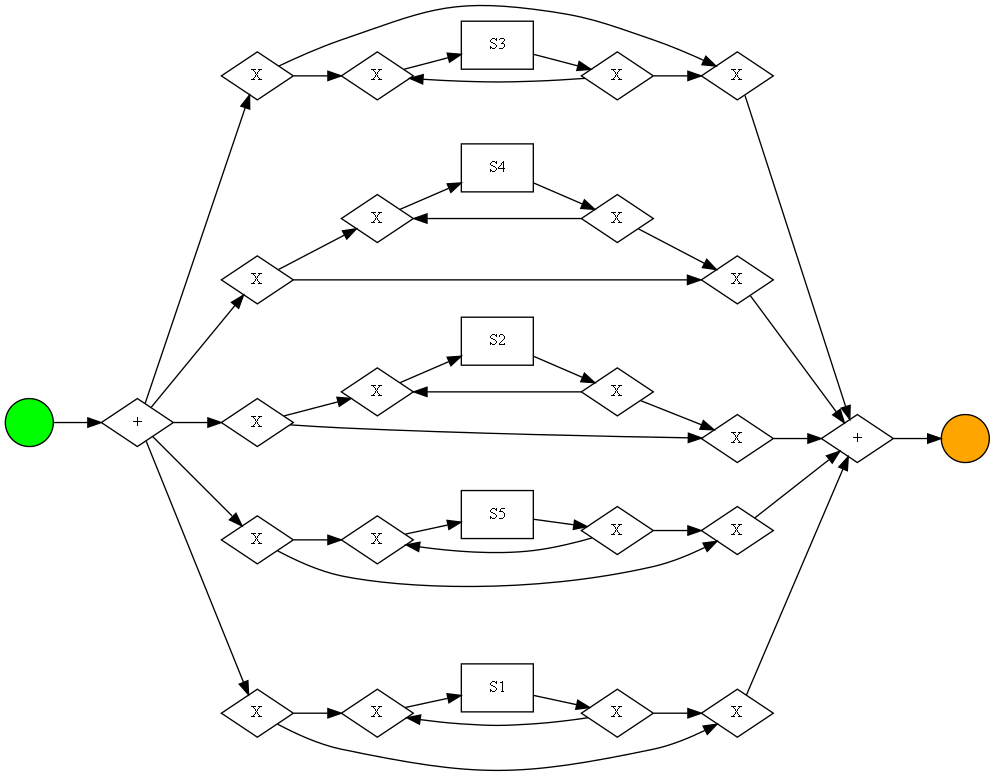

<Figure size 1152x1008 with 0 Axes>

In [168]:
bpmn_model = pm4py.convert_to_bpmn(tree)
plt.savefig('max_entropy.png',dpi=200)
pm4py.view_bpmn(bpmn_model)

In [88]:
def MakeProcessModel(filename, viztype="BPMN"):
    import pandas as pd
    from pm4py.objects.conversion.log import converter as log_converter 
    from pm4py.algo.discovery.inductive import algorithm as inductive_miner
    from pm4py.algo.discovery.alpha import algorithm as alpha_miner
    from pm4py.objects.conversion.process_tree import converter as pt_converter
    import pm4py

    # extra step to allow graphviz to be found 
    import os
    os.environ["PATH"] += os.pathsep + 'C:/Users/Mike/anaconda3/envs/TF2_CUD11_CRM_PAPER/Library/bin/graphviz'
    
    #eventlog
    eventlog = pd.read_csv(filename)
    
    
    # rename variables for pm4py
    eventlog.rename(columns={'start_datetime': 'time:timestamp', 
                            'caseid': 'case:concept:name', 
                            'activity': 'concept:name', 
                            'start_day': 'org:resource'}, 
                                            inplace=True)
    ## Convert to log format 
    log = log_converter.apply(eventlog)

    tree = pm4py.discover_tree_inductive(log)
    net, initial_marking, final_marking = pt_converter.apply(tree)

    if viztype == "BPMN":
        # Discover process tree using inductive miner
        
        #tree = inductive_miner.apply_tree(log)
        
        bpmn_model = pm4py.convert_to_bpmn(tree)
        
        pm4py.view_bpmn(bpmn_model)

    if viztype == "Petrinet":
        ## Either discover the petri net using inductive miner
        #net, initial_marking, final_marking = inductive_miner.apply(log)

        ## Or convert your existing model
        #net, initial_marking, final_marking = pt_converter.apply(tree)

        ## Then visualise
        gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                                   #variant=pn_visualizer.Variants.FREQUENCY, 
                                   log=log)
        pn_visualizer.view(gviz)
    
    return

In [89]:
len(results)

2304

In [90]:
df.head()

,caseid,activity,activity_no,y_acc_sum,X,Y,z_t,h_t,b_t,q_t,s_t,v_t,arrival_datetime,start_datetime,end_datetime,start_day,start_hour
0,0,S10,1,1.410363,1.329638,1.410363,1.329638,0.0,1.658404,2.988042,0.000000,0.080726,1970-01-06 07:54:40,1970-01-07 23:42:46,1970-01-06 09:50:55,Wednesday,23
1,0,S1,2,3.028393,1.410363,1.618029,1.329638,0.0,0.476178,1.886541,0.000000,0.207666,1970-01-06 09:50:55,1970-01-06 21:16:37,1970-01-06 14:49:57,Tuesday,21
2,0,S6,3,5.218037,1.618029,2.189645,1.329638,0.0,0.491648,2.109677,0.390323,0.181292,1970-01-06 14:49:57,1970-01-07 12:00:00,1970-01-07 04:33:05,Wednesday,12
3,0,S2,4,7.731248,2.189645,2.513211,1.329638,0.0,3.275345,5.464989,0.035011,0.288556,1970-01-07 04:33:05,1970-01-10 12:00:00,1970-01-07 12:19:01,Saturday,12
4,0,S4,5,10.547277,2.513211,2.816029,1.329638,0.0,0.879220,3.392431,0.107569,0.195249,1970-01-07 12:19:01,1970-01-08 12:00:00,1970-01-07 19:35:04,Thursday,12


# BPMN

In [91]:
show_exp_settings = True

../Process_sim/0_Eventlog_min_entropy_memoryless.csv


C:\Users\Mike\AppData\Local\Temp\ipykernel_10844\3724267189.py:26: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.4.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  tree = pm4py.discover_tree_inductive(log)


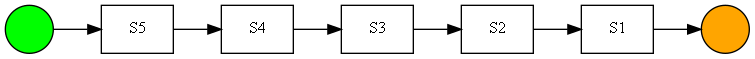

save_eventlog                                1.0
statespace_size                                5
number_of_traces                           100.0
process_entropy                      min_entropy
process_type                          memoryless
process_memory                               5.0
PS_med_ent_e_steps                           0.0
PS_med_ent_n_transitions                     3.0
PS_med_ent_max_trials                        0.0
TS_inter_arrival_time                        1.5
TS_process_stability_scale                   0.1
TS_resource_availability_p                   0.5
TS_resource_availability_n                   3.0
TS_resource_availability_m                 0.041
TS_activity_duration_lambda_range            1.0
Deterministic_offset_type_W             weekdays
Deterministic_offset_u                       7.0
repetitions                                  1.0
Name_fix                                       1
RUN                                            1
Done                

<Figure size 1008x576 with 0 Axes>

In [93]:
num = 0
print(filenames[num])

MakeProcessModel(filename=filenames[num],viztype="BPMN") #"Petrinet"

if show_exp_settings == True:
    print(experiments.loc[num])

plt.savefig(str(num)+"_"+results.loc[num].process_entropy+'.png')

A:/Process_sim/6_Eventlog_med_entropy_memoryless.csv


<ipython-input-92-f8f82deff9b4>:26: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.3.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  tree = pm4py.discover_tree_inductive(log)


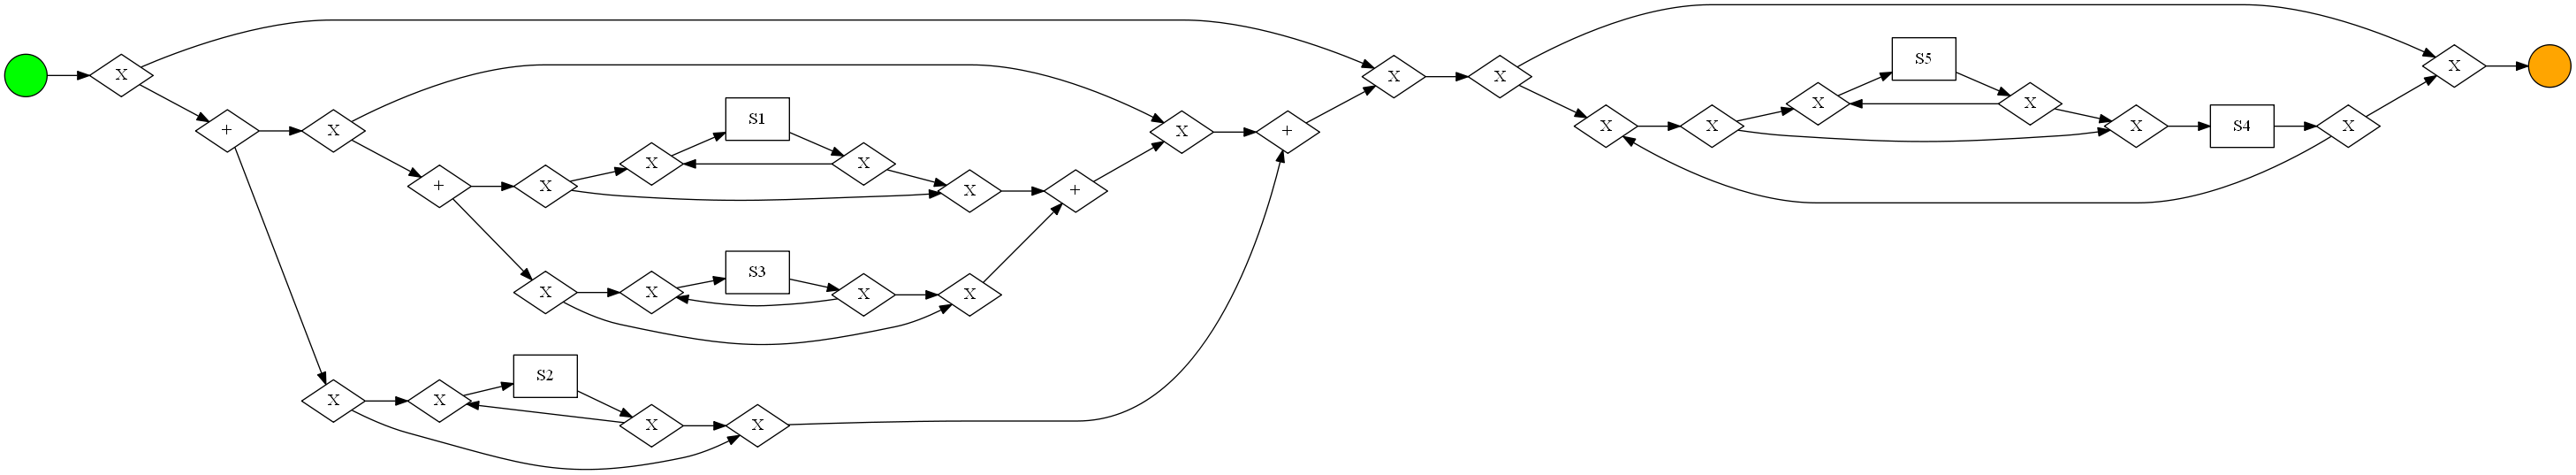

save_eventlog                                  1
statespace_size                                5
number_of_traces                             100
process_entropy                      med_entropy
process_type                          memoryless
process_memory                                 5
PS_med_ent_e_steps                             0
PS_med_ent_n_transitions                       3
PS_med_ent_max_trials                          0
TS_inter_arrival_time                        1.5
TS_process_stability_scale                   0.1
TS_resource_availability_p                   0.5
TS_resource_availability_n                     3
TS_resource_availability_m                 0.041
TS_activity_duration_lambda_range              1
Deterministic_offset_type_W             weekdays
Deterministic_offset_u                         7
repetitions                                    1
Name_fix                                       1
RUN                                            7
Done                

In [104]:
num = 6
print(filenames[num])
MakeProcessModel(filename=filenames[num],viztype="BPMN") #"Petrinet"
if show_exp_settings == True:
    print(experiments.loc[num])

A:/Process_sim/12_Eventlog_max_entropy_memoryless.csv


<ipython-input-92-f8f82deff9b4>:26: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.3.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  tree = pm4py.discover_tree_inductive(log)


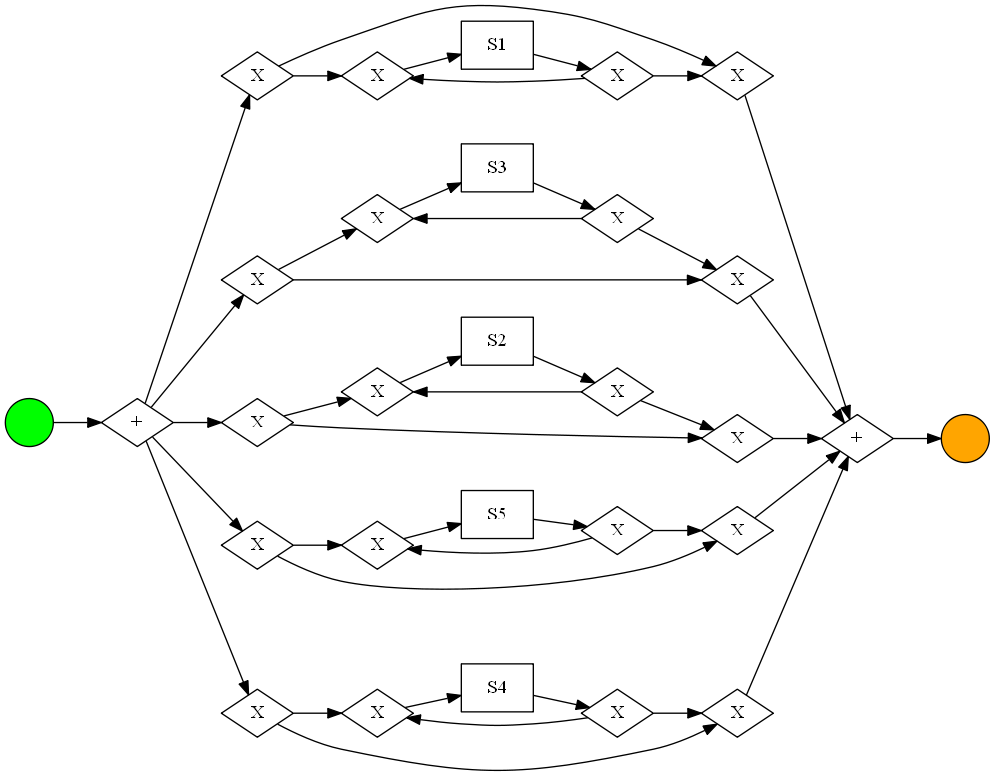

save_eventlog                                  1
statespace_size                                5
number_of_traces                             100
process_entropy                      max_entropy
process_type                          memoryless
process_memory                                 5
PS_med_ent_e_steps                             0
PS_med_ent_n_transitions                       3
PS_med_ent_max_trials                          0
TS_inter_arrival_time                        1.5
TS_process_stability_scale                   0.1
TS_resource_availability_p                   0.5
TS_resource_availability_n                     3
TS_resource_availability_m                 0.041
TS_activity_duration_lambda_range              1
Deterministic_offset_type_W             weekdays
Deterministic_offset_u                         7
repetitions                                    1
Name_fix                                       1
RUN                                           13
Done                

In [108]:
num = 12
print(filenames[num])
MakeProcessModel(filename=filenames[num],viztype="BPMN") #"Petrinet"
if show_exp_settings == True:
    print(experiments.loc[num])

<ipython-input-400-9e9cd1054c56>:26: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.3.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  tree = pm4py.discover_tree_inductive(log)


A:/Process_sim/3_Eventlog_med_entropy_memoryless.csv


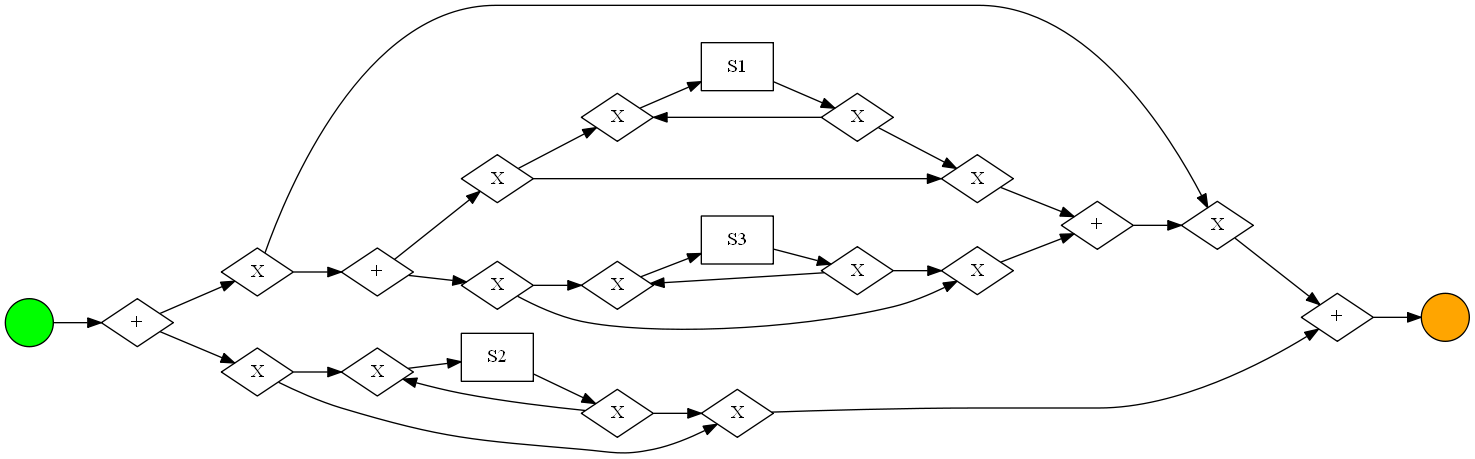

In [405]:
num = 3
print(filenames[num])
MakeProcessModel(filename=filenames[num],viztype="BPMN") #"Petrinet"
if show_exp_settings == True:
    print(experiments.loc[num])

A:/Process_sim/4_Eventlog_med_entropy_memoryless.csv


<ipython-input-400-9e9cd1054c56>:26: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.3.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  tree = pm4py.discover_tree_inductive(log)


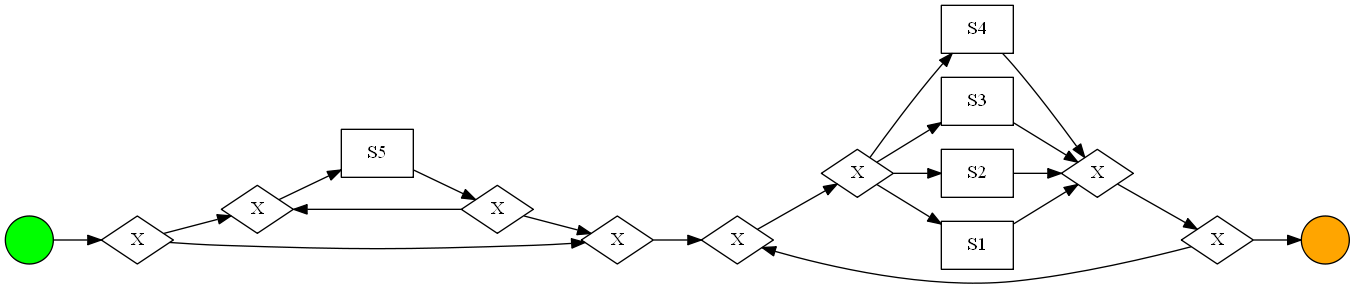

In [406]:
num = 4
print(filenames[num])
MakeProcessModel(filename=filenames[num],viztype="BPMN") #"Petrinet"
if show_exp_settings == True:
    print(experiments.loc[num])

A:/Process_sim/5_Eventlog_med_entropy_memoryless.csv


<ipython-input-400-9e9cd1054c56>:26: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.3.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  tree = pm4py.discover_tree_inductive(log)


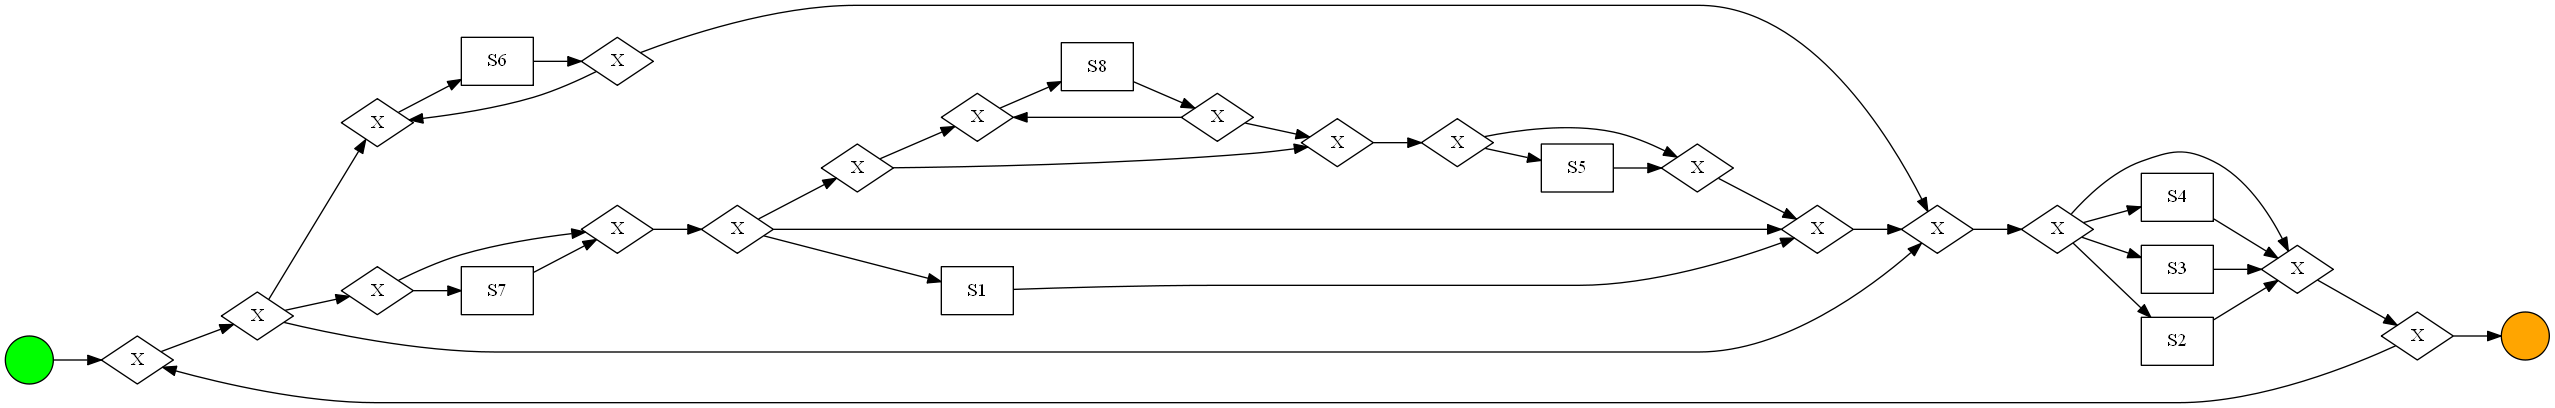

In [407]:
num = 5
print(filenames[num])
MakeProcessModel(filename=filenames[num],viztype="BPMN") #"Petrinet"
if show_exp_settings == True:
    print(experiments.loc[num])

A:/Process_sim/6_Eventlog_max_entropy_memoryless.csv


<ipython-input-400-9e9cd1054c56>:26: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.3.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  tree = pm4py.discover_tree_inductive(log)


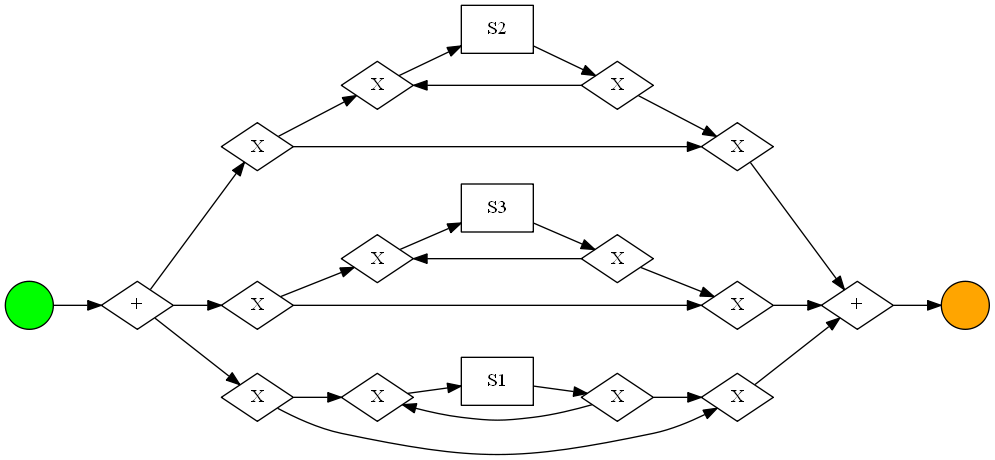

In [408]:
num = 6
print(filenames[num])
MakeProcessModel(filename=filenames[num],viztype="BPMN") #"Petrinet"
if show_exp_settings == True:
    print(experiments.loc[num])

In [231]:
process0 = [0.99,0.99,0.99,0.99]
process1 = [0.5,0.5,0.5,0.5]
process2 = [0.2,0.2,0.2,0.2]
process3 = [0.01,0.01,0.01,0.01]

ent = process0 * np.log(process3)
np.sum(ent)

-18.23647393651284